# Just for reference - Sage 11/24/2023

## Import statements

In [ ]:
# Imports 
from __future__ import print_function

# Numbers and Plotting
import numpy as np
import matplotlib.pyplot as plt
#np = numpy

import pandas as pd
from pandas import DataFrame, Series

# This is importing a "future" python version 3 print function.
%matplotlib inline

#from matplotlib import pyplot
#plt = pyplot

In [ ]:
# PLOTTING: Example helper function 
# Though it might not be clear how helpful of a helper function this is at the moment, when you want to change plots globally, 
# you may find being able to change things once here in plot_xy is easier than changing all of your individual 
# "plt.scatter()" or plt.errorbar commands throughout all of your plots.

# You can define a function plot_xy to make LINEAR plots:
def plot_xy(data1,data2,color='red',fmt = 'x'):

    ## Use the plt.scatter function to make a scatter plot with cool options:
    plt.scatter(data1,data2,s=1.0,c=color,alpha=0.5,marker=fmt)
    ## Use the plt.plot function to a line plot, specifying color:
    # plt.scatter(data1,data2,color=color)

    ## DEFINE YOUR LIMITS (AUTOSCALE TO DATA)
#    plt.xlim(np.min(data1),np.max(data1))
#    plt.ylim(np.max(data2),np.min(data2))

    ## OPTIONS
    ## Use the plt.errorbar function to a scatter or line plot, specifying color & point shape (fmt):
#    plt.errorbar(data1,data2,color=color, fmt = fmt, capsize=0)

    ## LABEL YOUR AXES
#    plt.xlabel('Exposure Time (sec)')
#    plt.ylabel('SNR')

    ## DEFINE YOUR LIMITS (MANUALLY SET MAX VALUE)
#    plt.ylim(16,14)

## Read in some data tables

In [70]:
# Read in data using PANDAS dataframe formet
## Let's read in a CSV file and then start with some preliminary plots ... might make sense to start a new notebook here:
df_in=pd.read_csv("./MysteryGC_phot_all_redo.csv")

# Reformat the timestamp from object to date type to allow it to be plottable:
df_in["timestamp2"] = pd.to_datetime(df_in["timestamp"],format='%Y-%m-%dT%H:%M:%S')

# Show the dtypes for all the columns:
df=df_in

# DEFINE SOME CONSTANTS
# using VEGA mag zeropoints for 2006-05-02
ZPC_F606=26.415-25
ZPC_F814=25.517-25
x0=2635.95
y0=2657
df['radius'] = ((df.xcenter-x0)*(df.xcenter-x0)+(df.ycenter-y0)*(df.ycenter-y0))**0.5

_radii = [1.0,1.5,2.0,2.5,3.0,3.5] # in hwhm
hwhm = 3/2 # px
# Take a look at the data to see if they look reasonable with good column names:
# print (df.head(3)),df.head(3)
#dfi
apstats_df = pd.DataFrame()
apstats_df["Aperture(px)"] = [r*hwhm for r in _radii]
apstats_df["AvgMagErr"] = [round(df[f"mag_err_{i}"].mean(),6) for i in range(6)]
apstats_df["AvgMag"] = [round(df[f"mag_{i}"].mean(),6) for i in range(6)]
print(apstats_df.head(6))
apstats_df.to_csv("aperture_stats.csv", index=None)
for i in range(6):
    print(hwhm*_radii[i],round(df[f"mag_err_{i}"].mean(),6),round(df[f"mag_err_{i}"].mean(),6)) 
# Check dtypes to see if numbers appears to have numerical data types:
#print (dfi.dtypes,dfv.dtypes)
#print (dfi.c13,dfi.c26)
#dfi.dtypes.head()

   Aperture(px)  AvgMagErr     AvgMag
0          1.50   0.005203  20.651634
1          2.25   0.005172  20.261782
2          3.00   0.004766  20.069195
3          3.75   0.004303  19.951275
4          4.50   0.004650  19.852627
5          5.25   0.004891  19.746142
1.5 0.005203 0.005203
2.25 0.005172 0.005172
3.0 0.004766 0.004766
3.75 0.004303 0.004303
4.5 0.00465 0.00465
5.25 0.004891 0.004891


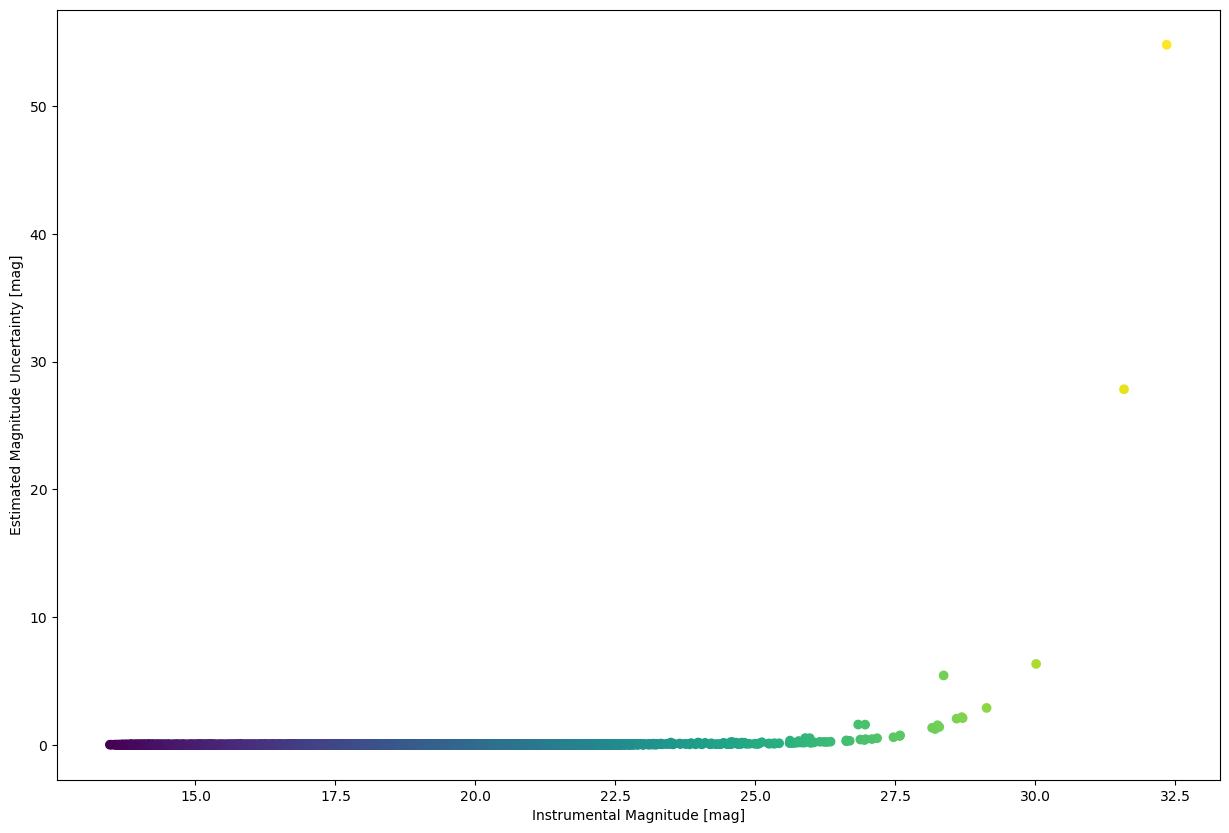

In [10]:
# Let's first just plot magnitude vs. star ID to see which star mags are most stable:
plt.figure(figsize=(15,10))
plt.scatter(df['mag_1'],df['mag_err_1'],c=df['mag_1'],marker='o')
# To zoom in or out you can set the ylimits:
## LABEL YOUR AXES
plt.xlabel('Instrumental Magnitude [mag]')
plt.ylabel('Estimated Magnitude Uncertainty [mag]')

In [11]:
# Let's split up the V vs I data F606W vs F814W
dfv=df[df['filter1']=="F606W"]
dfi=df[df['filter2']=="F814W"]
dfv.reset_index(drop=True,inplace=True)
dfi.reset_index(drop=True,inplace=True)

## Let's some initial plots to validate the data

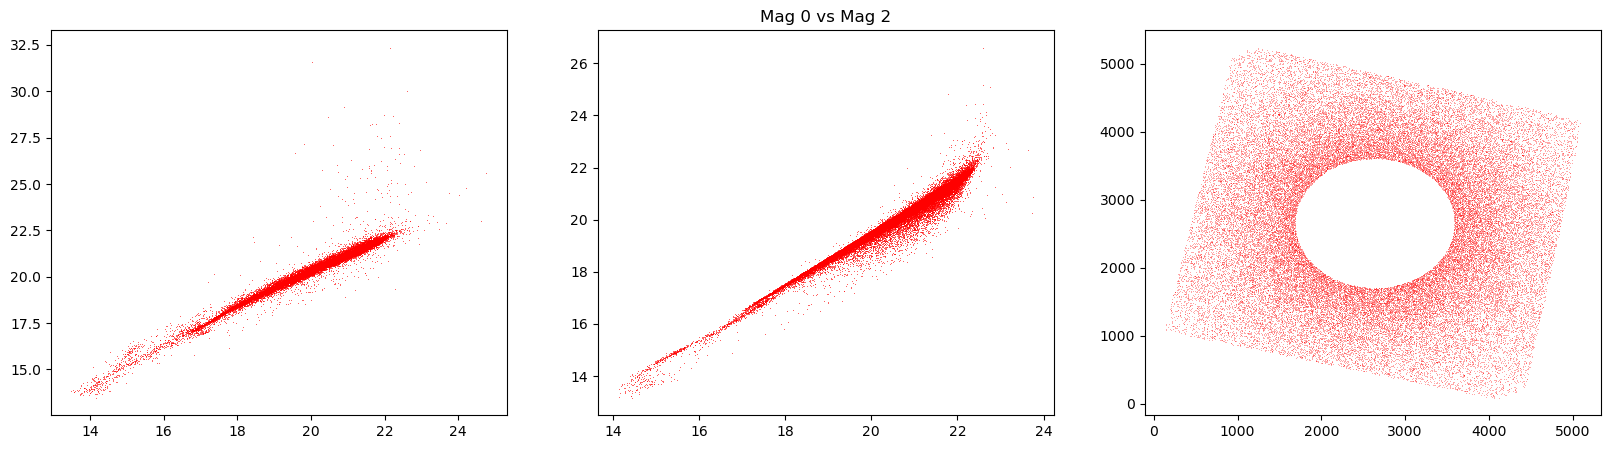

In [12]:
plt.figure(figsize=(20,5))

plt.subplot(131)

plt.scatter(dfv["mag_1"],dfi["mag_1"],marker=".",s=1,c='red',linewidth=0)
#plt.xlim(-2,2)
#plt.ylim(33,20)

plt.subplot(132)
plt.title("Mag 0 vs Mag 2")
plt.scatter(dfv["mag_0"],dfv["mag_2"],marker=".",s=1,c='red',linewidth=0)
#plt.xlim(-2,2)
#plt.ylim(-0.1,2)

plt.subplot(133)
plt.scatter(dfv["xcenter"],dfv["ycenter"],marker=".",s=0.5,c='red',linewidth=0)
#plt.xlim(-0.8,0.2)
#plt.ylim(33,20)


In [13]:
# aperture correction
# zero point correction
# reddening correction

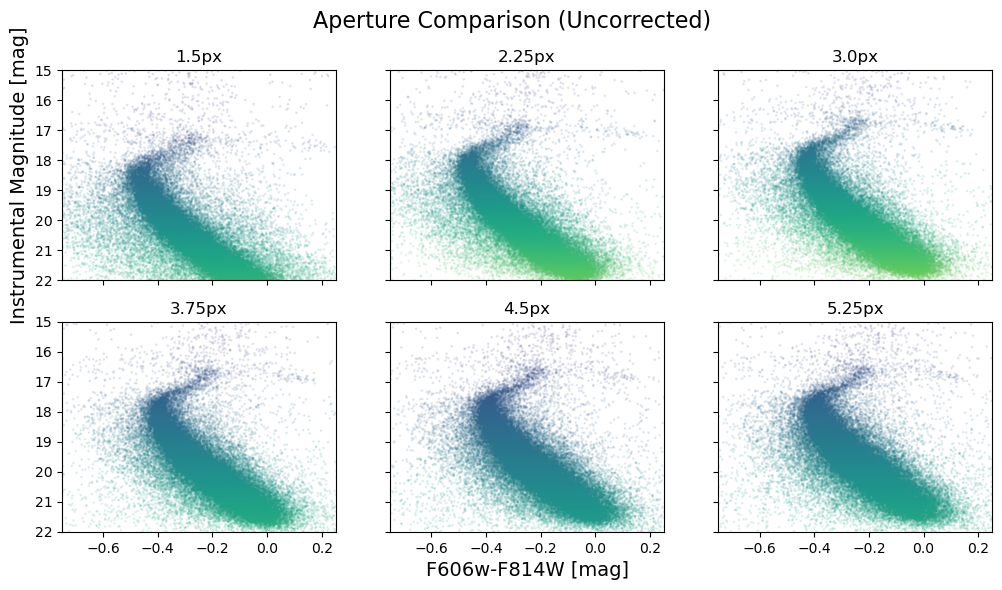

In [76]:
dfvi=pd.DataFrame()
fig, axes = plt.subplots(nrows=2,ncols=3,sharex=True,sharey=True,figsize=(12,6))
for i, ax in enumerate(axes.reshape(6)):
    dfvi[f'mag_vi_{i}']=dfv[f'mag_{i}']-dfi[f'mag_{i}']
    ax.scatter(dfvi[f'mag_vi_{i}'],dfv[f'mag_{i}'],c=dfv[f'mag_{i}'],alpha=0.1,s=1)
    plt.xlim(-0.75,0.25)
    plt.ylim(22,15)
    ax.set_title(f'{_radii[i]*hwhm}px')

axes[0][0].set_ylabel('Instrumental Magnitude [mag]',fontsize=14)

axes[1][1].set_xlabel("F606w-F814W [mag]",fontsize=14)
fig.suptitle("Aperture Comparison (Uncorrected)",fontsize=16)
plt.savefig("aperture_comparison.png", bbox_inches='tight')

In [15]:
# choose aperture
ap_idx = 3
aperture = _radii[ap_idx]*hwhm
u_mag_col = f'mag_{ap_idx}'
mag_err_col = f'mag_err_{ap_idx}'
u_color_col = f'mag_vi_{ap_idx}'

/var/folders/ht/2c9zfynn01qdtc_tpz9s2hx80000gq/T/ipykernel_92001/2825835023.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfv[zp_col] = dfv[u_mag_col] + ZPC_F606
/var/folders/ht/2c9zfynn01qdtc_tpz9s2hx80000gq/T/ipykernel_92001/2825835023.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfi[zp_col] = dfi[u_mag_col] + ZPC_F814
/var/folders/ht/2c9zfynn01qdtc_tpz9s2hx80000gq/T/ipykernel_92001/2825835023.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.

0.83 0.825
-0.20230476905981534 -0.2088651286251873


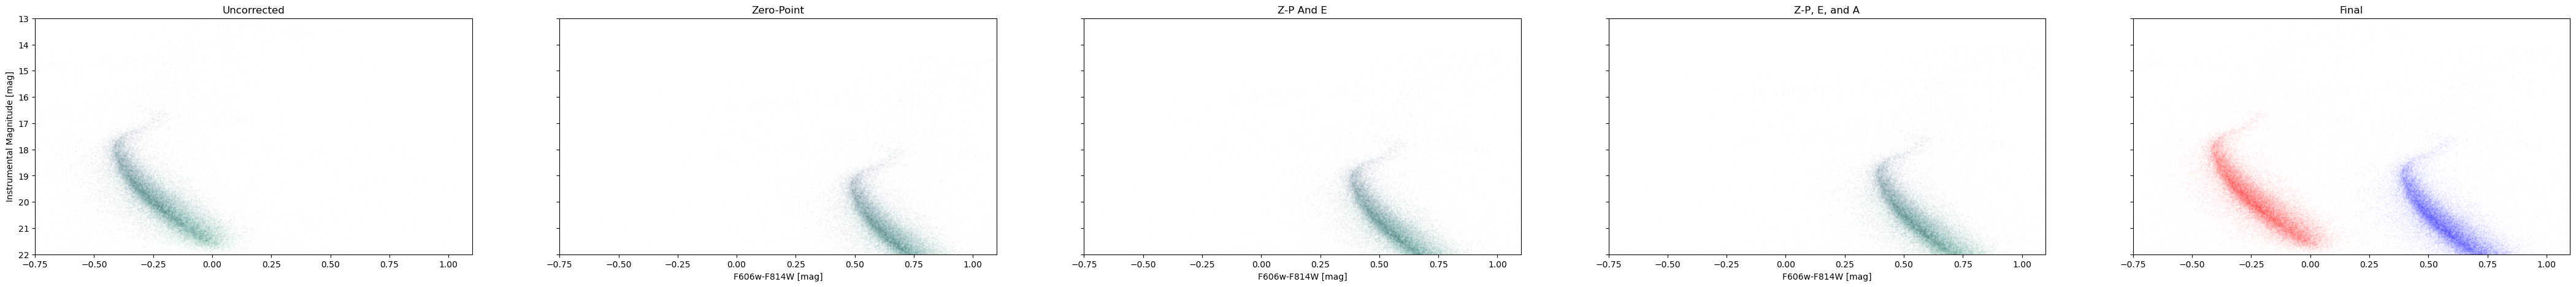

In [68]:
import math
# corrections


iso_m05=pd.read_csv('HST_ISOCHRONES/ph_fehm05afep2.HST_ACSWF', skiprows=0, header=1, sep='\s+', index_col=False)


# zero point correction
zp_col = f"mag_{ap_idx}_zp"
zp_color_col = f"mag_vi_{ap_idx}_zp"

dfv[zp_col] = dfv[u_mag_col] + ZPC_F606
dfi[zp_col] = dfi[u_mag_col] + ZPC_F814
dfvi[zp_color_col] = dfv[zp_col] - dfi[zp_col]

# extinction correction

E_606 = 0.270
E_814 = 0.167

zp_E_col = f"mag_{ap_idx}_zp_E"
zp_E_color_col = f"mag_vi_{ap_idx}_zp_E"

dfv[zp_E_col] = dfv[zp_col] - E_606
dfi[zp_E_col] = dfi[zp_col] - E_814
dfvi[zp_E_color_col] = dfv[zp_E_col] - dfi[zp_E_col]

# aperture correction

# using diameter
# n_606 = 0.896+(0.904-0.896)/2  
# n_814 = 0.889+(0.901-0.889)/2

# using new hubble 
n_606 = 0.83
n_814 =  0.825

# # using radius
# n_606 = 0.795+3*(0.904-0.795)/4
# n_814 = 0.770+3*(0.830-0.770)/4



print(n_606,n_814)

A_606 = -2.5*math.log(1/n_606,10)
A_814 = -2.5*math.log(1/n_814,10)
print(A_606,A_814)

mag_col = f"mag_{ap_idx}_corrected"
color_col = f"mag_vi_{ap_idx}_corrected"

dfv[mag_col] = dfv[zp_E_col] + A_606
dfi[mag_col] = dfi[zp_E_col] + A_814
dfvi[color_col] = dfv[mag_col] - dfi[mag_col]

# graph

fig, axes = plt.subplots(ncols=5,sharex=True,sharey=True,figsize=(2*16/3*5,5))

ax = axes[0]
ax.set_title("Uncorrected")
ax.set_ylabel('Instrumental Magnitude [mag]')
ax.scatter(dfvi[u_color_col],dfv[u_mag_col],c=dfv[u_mag_col],alpha=0.01,s=1)

ax = axes[1]
ax.set_title("Zero-Point")
ax.set_xlabel("F606w-F814W [mag]")
ax.scatter(dfvi[zp_color_col],dfv[zp_col],c=dfv[zp_col],alpha=0.01,s=1)

ax = axes[2]
ax.set_title("Z-P And E")
ax.set_xlabel("F606w-F814W [mag]")
ax.scatter(dfvi[zp_E_color_col],dfv[zp_E_col],c=dfv[zp_E_col],alpha=0.01,s=1)

ax = axes[3]
ax.set_title("Z-P, E, and A")
ax.set_xlabel("F606w-F814W [mag]")
ax.scatter(dfvi[color_col],dfv[mag_col],c=dfv[mag_col],alpha=0.01,s=1)

ax = axes[4]
ax.set_title("Final")
ax.scatter(dfvi[u_color_col],dfv[u_mag_col],c='red',alpha=0.01,s=1,label="Uncorrected")
ax.scatter(dfvi[color_col],dfv[mag_col],c='blue',alpha=0.01,s=1, label="Corrected")

plt.xlim(-0.75,1.1)
plt.ylim(22,13)
plt.savefig("all_corrections.png", bbox_inches='tight')

plt.show()


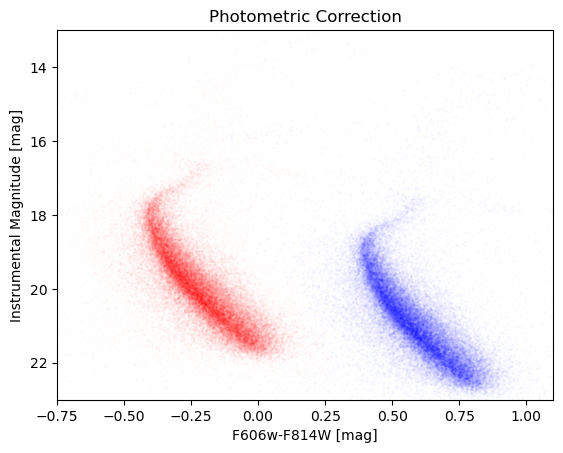

In [69]:
fig, ax = plt.subplots()
ax.set_title("Photometric Correction")
ax.scatter(dfvi[u_color_col],dfv[u_mag_col],c='red',alpha=0.01,s=1,label="Uncorrected")
ax.scatter(dfvi[color_col],dfv[mag_col],c='blue',alpha=0.01,s=1, label="Corrected")
# ax.legend(markerscale=5)
plt.xlim(-0.75,1.1)
plt.ylim(23,13)
ax.set_xlabel("F606w-F814W [mag]")
ax.set_ylabel('Instrumental Magnitude [mag]')
plt.savefig("photometric_correction.png", bbox_inches='tight')
plt.show()


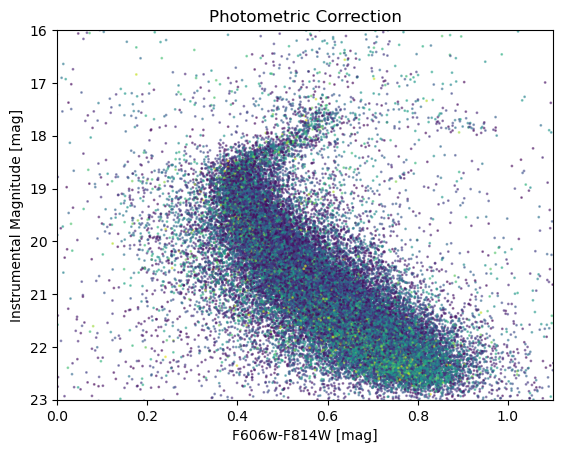

In [18]:
fig, ax = plt.subplots()
ax.set_title("Photometric Correction")
a = ax.scatter(dfvi[color_col],dfv[mag_col],c=dfv["radius"],alpha=0.5,s=1)
plt.xlim(0,1.1)
plt.ylim(23,16)
ax.set_xlabel("F606w-F814W [mag]")
ax.set_ylabel('Instrumental Magnitude [mag]')
plt.savefig("photometric_correction_color.png", bbox_inches='tight')

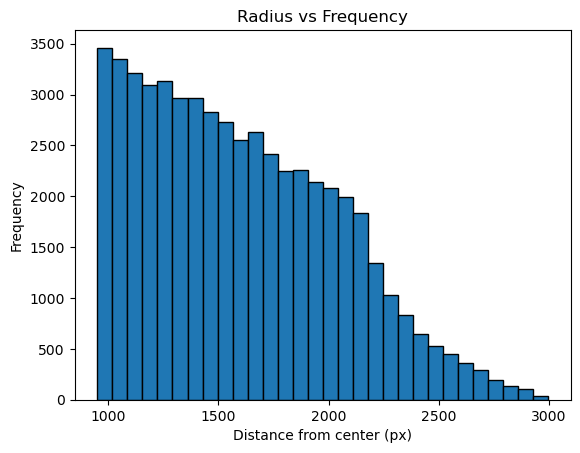

In [19]:
plt.hist(dfv["radius"], bins=30, edgecolor='black')
plt.title("Radius vs Frequency")
plt.xlabel("Distance from center (px)")
plt.ylabel("Frequency")
plt.show()

In [20]:
from scipy.spatial.distance import cdist

def pairwise_distance(points1,points2):
#     return np.sqrt((x_coords-x_coords[:,np.newaxis])**2+(y_coords-y_coords[:,np.newaxis])**2)
    return cdist(points1,points2)

def oneDimensionPairwiseDistance(array1,array2):
    # print(f"Array 1 shape: {array1.shape}, Array 2 shape: {array2.shape}")
    # dist_matrix = np.zeros((len(array1),len(array2)))
    # for i, a1 in enumerate(array1):
    #     for j, a2 in enumerate(array2):
    #         dist_matrix[i,j] = np.abs((a1-a2))
    array1 = array1.reshape(-1,1)
    array2 = array2.reshape(1,-1)
    dist_matrix = np.abs(array1-array2)
    
    return dist_matrix

# print(oneDimensionPairwiseDistance([1,2,3,4],[1,2,3,4,5]))

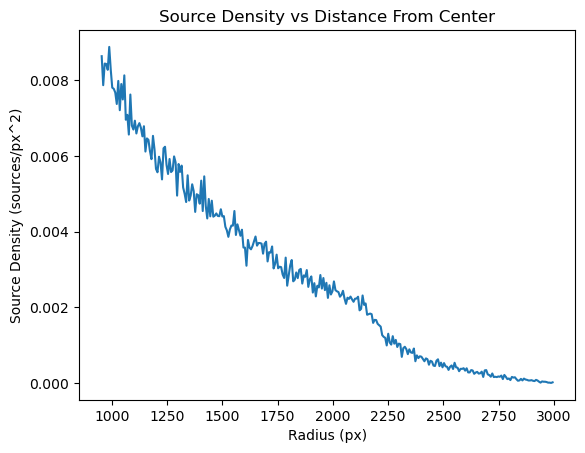

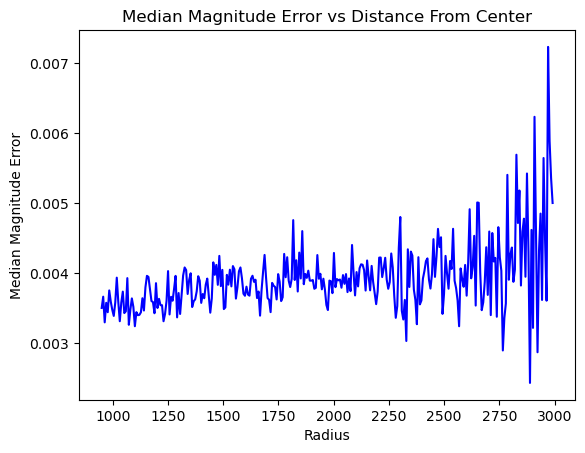

In [21]:
import numpy as np

num_bins = 300

values, bin_edges = np.histogram(dfv["radius"], bins=num_bins)

radii = []
densities = []
for i in range(num_bins):
    radii.append((bin_edges[i]+bin_edges[i+1])/2)
    densities.append(values[i]/((bin_edges[i+1]**2-bin_edges[i]**2)*np.pi))

plt.plot(radii, densities)
plt.title("Source Density vs Distance From Center")
plt.xlabel("Radius (px)")
plt.ylabel("Source Density (sources/px^2)")
plt.savefig("source_density.png", bbox_inches='tight')
plt.show()

# mean mag_err vs Distance From Center
fig, ax = plt.subplots()

bins = np.digitize(dfv["radius"], bin_edges)

binned_mag_errs = [np.median(np.abs(dfv.loc[bins == i, mag_err_col].to_numpy())) for i in range(1, len(bin_edges))]
mean_mag_errors = [np.mean(np.abs(dfv.loc[bins == i, mag_err_col].to_numpy())) for i in range(1, len(bin_edges))]

plt.plot(bin_edges[:-1], binned_mag_errs,c="blue",label="Median")
# plt.plot(bin_edges[:-1], mean_mag_errors,c="red",label="Mean")
# plt.legend()
plt.title("Median Magnitude Error vs Distance From Center")
plt.xlabel("Radius")
plt.ylabel("Median Magnitude Error")
plt.show()


# distances = pairwise_distance(dfv["xcenter"].to_numpy(),dfv["ycenter"].to_numpy())
# mean_distances = np.mean(distances,axis=1)
# median_distances = np.median(distances,axis=1)
# radii = np.array(dfv["radius"])
# plt.plot(radii,mean_distances,c="red",label="Mean")
# plt.plot(radii,median_distances,c="blue",label="Median")
# plt.legend()
# plt.title("Mean and Median Distance to Neighbors vs Distance From Center")


In [22]:
points = np.column_stack((np.array(dfv["xcenter"]),np.array(dfv["ycenter"])))
nearby_neighbors = np.array([np.sum(np.linalg.norm(points-points[i],axis=1)<aperture*2) for i in range(len(points))])
# distances = np.linalg.norm(points-points[:,np.newaxis],axis=2)
# distances = pairwise_distance(dfv["xcenter"].to_numpy(),dfv["ycenter"].to_numpy())

In [23]:
dfv["nearby_neighbors"] = nearby_neighbors

/var/folders/ht/2c9zfynn01qdtc_tpz9s2hx80000gq/T/ipykernel_92001/2456341060.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfv["nearby_neighbors"] = nearby_neighbors


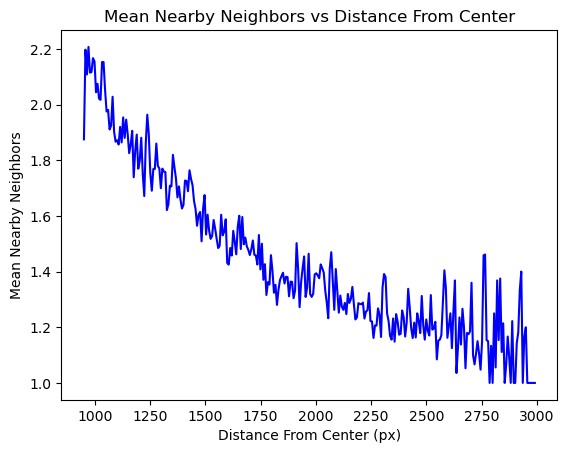

In [24]:
values, bin_edges = np.histogram(dfv["radius"], bins=num_bins)
bins = np.digitize(dfv["radius"], bin_edges)

mean_nearby_neighbors = [np.mean(np.abs(dfv.loc[bins == i, "nearby_neighbors"].to_numpy())) for i in range(1, len(bin_edges))]

plt.plot(bin_edges[:-1], mean_nearby_neighbors,c="blue")
plt.title("Mean Nearby Neighbors vs Distance From Center")
plt.xlabel("Distance From Center (px)")
plt.ylabel("Mean Nearby Neighbors")
plt.savefig("mean_nearby_neighbors.png", bbox_inches='tight')

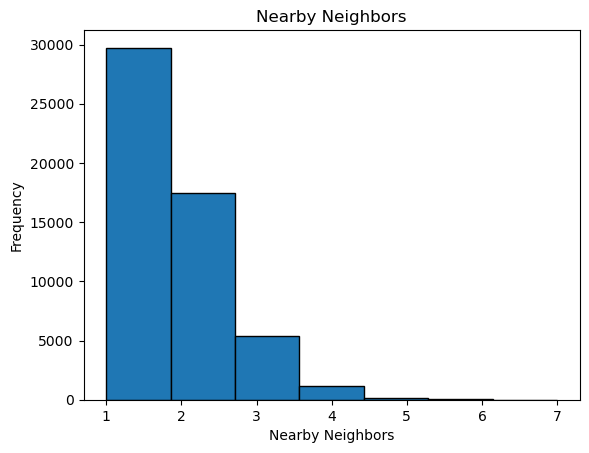

In [25]:
plt.hist(dfv["nearby_neighbors"], bins=7, edgecolor='black')
plt.title("Nearby Neighbors")
plt.xlabel("Nearby Neighbors")
plt.ylabel("Frequency")
plt.savefig("nearby_neighbor_hist.png", bbox_inches='tight')
plt.show()

/Users/student/anaconda3/envs/astroconda38/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/student/anaconda3/envs/astroconda38/lib/python3.8/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Text(0, 0.5, 'Magnitude Error (mag)')

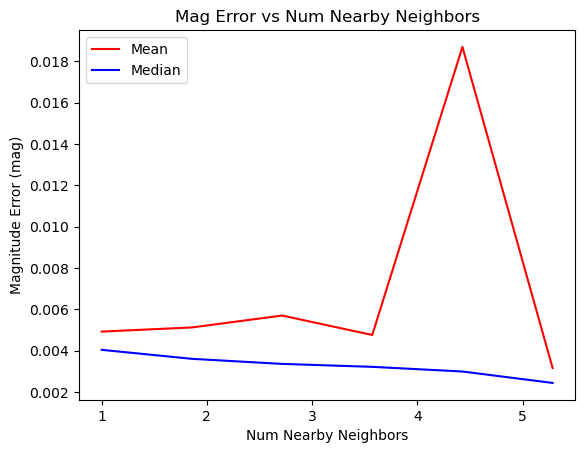

In [26]:
values, bin_edges = np.histogram(dfv["nearby_neighbors"], bins=7)
bins = np.digitize(dfv["nearby_neighbors"], bin_edges)

binned_mag_errors = [np.median(np.abs(dfv.loc[bins == i, mag_err_col].to_numpy())) for i in range(1, len(bin_edges))]
mean_mag_errors = [np.mean(np.abs(dfv.loc[bins == i, mag_err_col].to_numpy())) for i in range(1, len(bin_edges))]
plt.plot(bin_edges[:-1], mean_mag_errors,c="red",label="Mean")
plt.plot(bin_edges[:-1], binned_mag_errors,c="blue",label="Median")
plt.legend()
plt.title("Mag Error vs Num Nearby Neighbors")
plt.xlabel("Num Nearby Neighbors")
plt.ylabel("Magnitude Error (mag)")

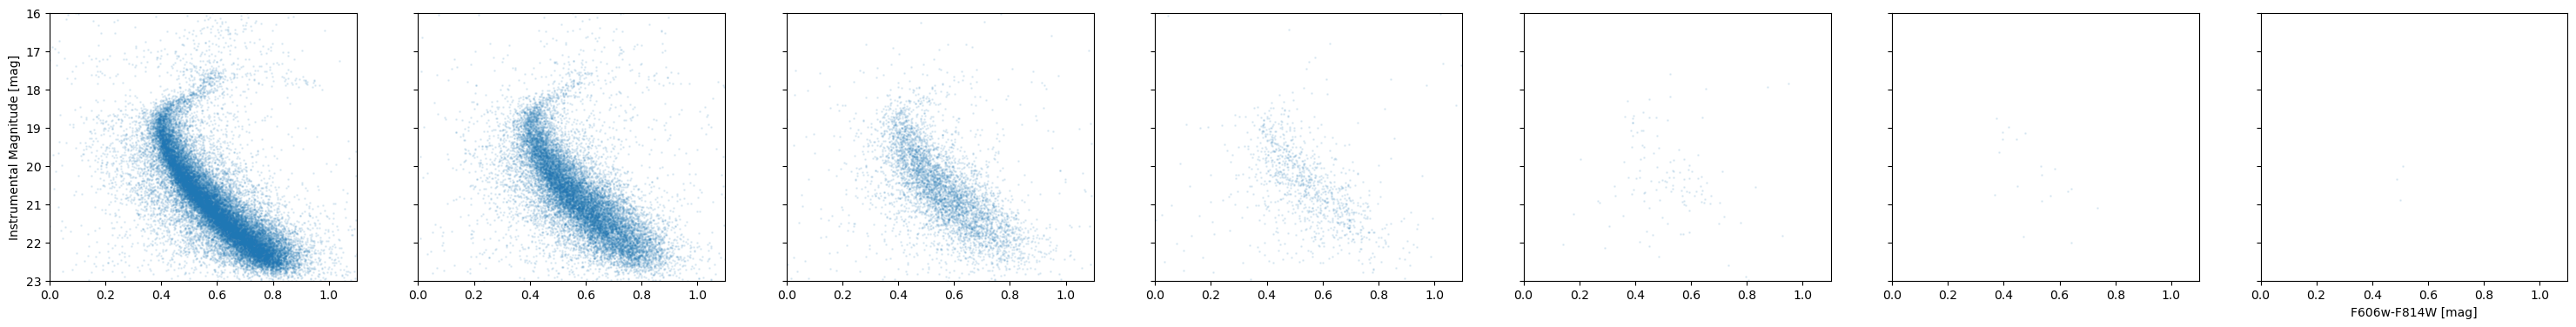

In [27]:
fig, axes = plt.subplots(ncols=7,sharex=True,sharey=True,figsize=(16/3*7,4))
for i, ax in enumerate(axes):
    downselect_idx = dfv["nearby_neighbors"] == i+1
    dfv_downselect = dfv[downselect_idx]
    dfvi_downselect = dfvi[downselect_idx]
    ax.scatter(dfvi_downselect[color_col],dfv_downselect[mag_col],alpha=0.1,s=1)
    plt.xlim(0,1.1)
    plt.ylim(23,16)
ax.set_xlabel("F606w-F814W [mag]")
axes[0].set_ylabel('Instrumental Magnitude [mag]')
plt.show()

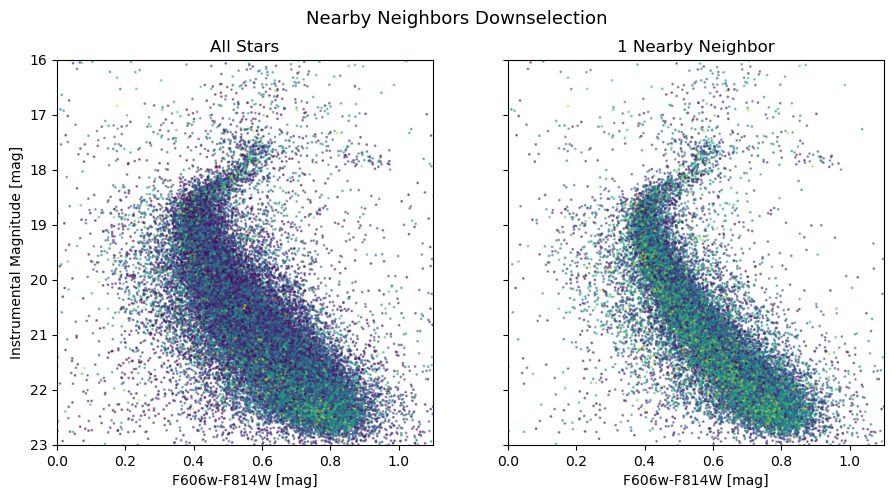

In [28]:
fig, axes = plt.subplots(ncols=2,sharex=True,sharey=True,figsize=(16/3*2,5))
plt.subplots_adjust(hspace=0.001)

ax = axes[0]
s1=ax.scatter(dfvi[color_col],dfv[mag_col],alpha=0.5,s=1, label="Corrected",c=dfv["radius"])
ax.set_ylabel('Instrumental Magnitude [mag]')
ax.set_xlabel("F606w-F814W [mag]")
ax.set_title("All Stars")

ax = axes[1]
downselect_idx = dfv["nearby_neighbors"] == 1
dfv_downselect = dfv[downselect_idx]
dfvi_downselect = dfvi[downselect_idx]
s2 = ax.scatter(dfvi_downselect[color_col],dfv_downselect[mag_col],alpha=0.5,s=1,c=dfv_downselect["radius"])
# plt.colorbar(s2,label="Distance From Center (px)")
ax.set_xlabel("F606w-F814W [mag]")
ax.set_title("1 Nearby Neighbor")

fig.suptitle("Nearby Neighbors Downselection",fontsize=13)
plt.xlim(0,1.1)
plt.ylim(23,16)
plt.savefig("nearby_neighbors_downselection.png", bbox_inches='tight')
plt.show()
dfv_downselect.to_csv("nearby_neighbors_downselect.csv")
dfvi_downselect.to_csv("nearby_neighbors_downselect_vi.csv")

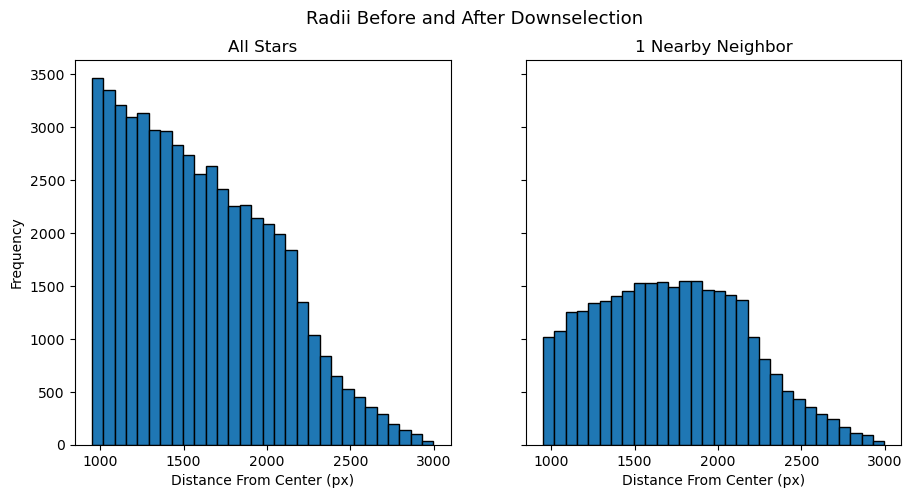

29729

In [29]:
fig, axes = plt.subplots(ncols=2,sharex=True,sharey=True,figsize=(16/3*2,5))

ax=axes[0]
ax.hist(dfv["radius"], bins=30, edgecolor='black')
ax.set_ylabel("Frequency")
ax.set_xlabel("Distance From Center (px)")
ax.set_title("All Stars")


ax = axes[1]
ax.hist(dfv_downselect["radius"], bins=30, edgecolor='black')
ax.set_xlabel("Distance From Center (px)")
ax.set_title("1 Nearby Neighbor")
plt.suptitle("Radii Before and After Downselection",fontsize=13)
plt.savefig("radii_after_neighbor_downselection.png", bbox_inches='tight')
plt.show()
len(dfv_downselect)

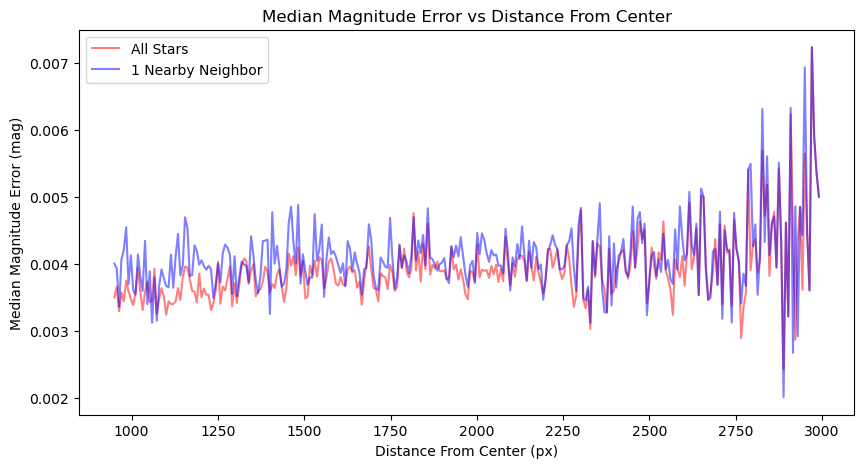

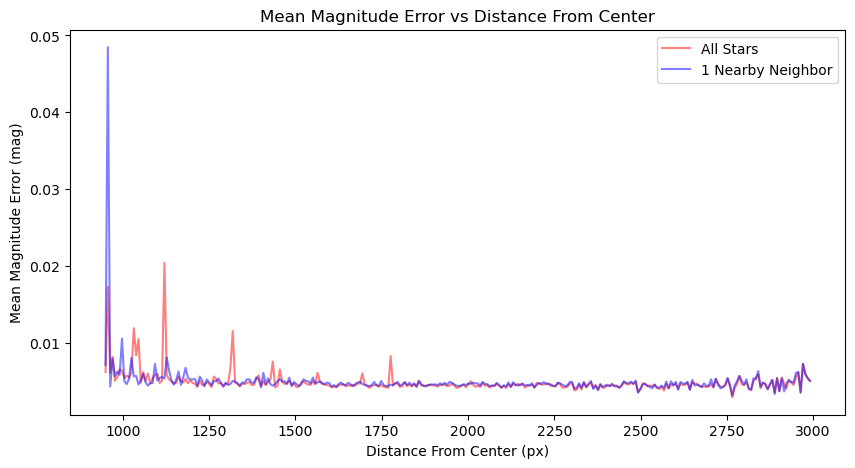

In [30]:
num_bins = 300

values, bin_edges = np.histogram(dfv["radius"], bins=num_bins)

# mean mag_err vs Distance From Center

uncut_bins = np.digitize(dfv["radius"], bin_edges)
cut_bins = np.digitize(dfv_downselect["radius"], bin_edges)

median_uncut_mag_errs = [np.median(np.abs(dfv.loc[uncut_bins == i, mag_err_col].to_numpy())) for i in range(1, len(bin_edges))]
median_downselected_mag_errs = [np.median(np.abs(dfv_downselect.loc[cut_bins == i, mag_err_col].to_numpy())) for i in range(1, len(bin_edges))]

fig, ax = plt.subplots(figsize=(10,5))

ax.plot(bin_edges[:-1], median_uncut_mag_errs,c="red",alpha=0.5, label="All Stars")
ax.plot(bin_edges[:-1], median_downselected_mag_errs,c="blue",alpha=0.5, label="1 Nearby Neighbor")
ax.set_title("Median Magnitude Error vs Distance From Center")
ax.set_xlabel("Distance From Center (px)")
ax.set_ylabel("Median Magnitude Error (mag)")
ax.legend()
plt.savefig("binned_mag_err_vs_radius.png", bbox_inches='tight')


mean_uncut_mag_errs = [np.mean(np.abs(dfv.loc[uncut_bins == i, mag_err_col].to_numpy())) for i in range(1, len(bin_edges))]
mean_downselected_mag_errs = [np.mean(np.abs(dfv_downselect.loc[cut_bins == i, mag_err_col].to_numpy())) for i in range(1, len(bin_edges))]

fig, ax = plt.subplots(figsize=(10,5))

ax.plot(bin_edges[:-1], mean_uncut_mag_errs,c="red",alpha=0.5, label="All Stars")
ax.plot(bin_edges[:-1], mean_downselected_mag_errs,c="blue",alpha=0.5, label="1 Nearby Neighbor")
ax.set_title("Mean Magnitude Error vs Distance From Center")
ax.set_xlabel("Distance From Center (px)")
ax.set_ylabel("Mean Magnitude Error (mag)")
ax.legend()
plt.savefig("mean_mag_err_vs_radius.png", bbox_inches='tight')



## Let's make three plots that are all the same, just displayed with different limits:

(22.0, 13.0)

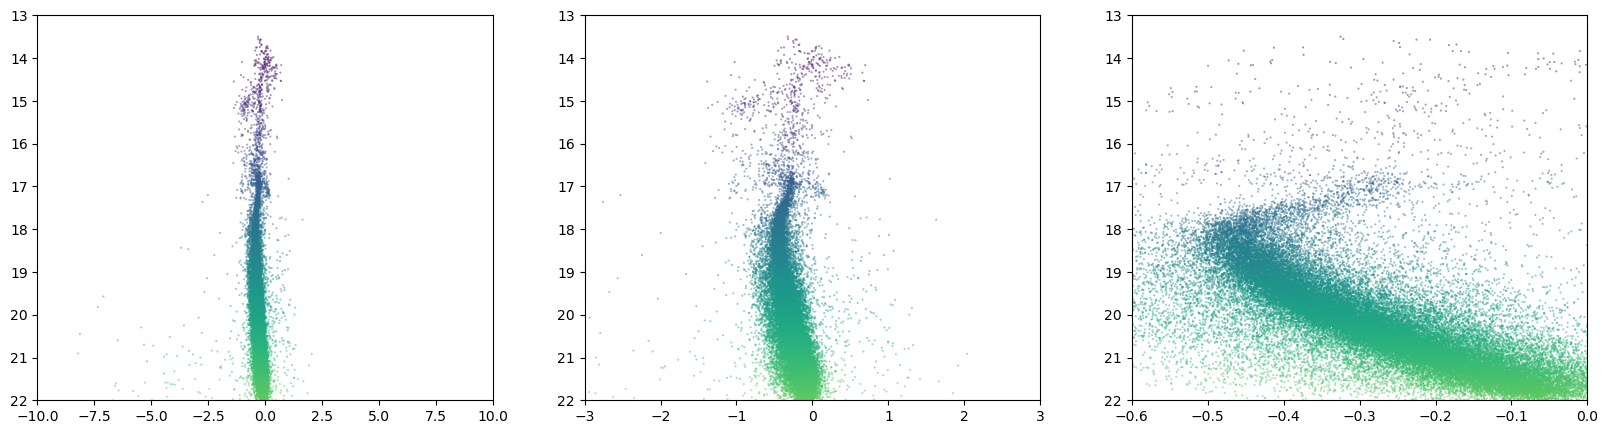

In [31]:
plt.figure(figsize=(20,5))

plt.subplot(131)
plot_xy(dfvi['mag_vi_1'],dfv['mag_1'],color=dfv['mag_1'],fmt='.')
plt.xlim(-10,10)
plt.ylim(22,13)

plt.subplot(132)
plot_xy(dfvi['mag_vi_1'],dfv['mag_1'],color=dfv['mag_1'],fmt='.')
plt.xlim(-3,3)
plt.ylim(22,13)

plt.subplot(133)
plot_xy(dfvi['mag_vi_1'],dfv['mag_1'],color=dfv['mag_1'],fmt='.')
plt.xlim(-0.6,0.0)
plt.ylim(22,13)


## Let's make three plots with different radius cuts:

(46421, 7439, 53860)

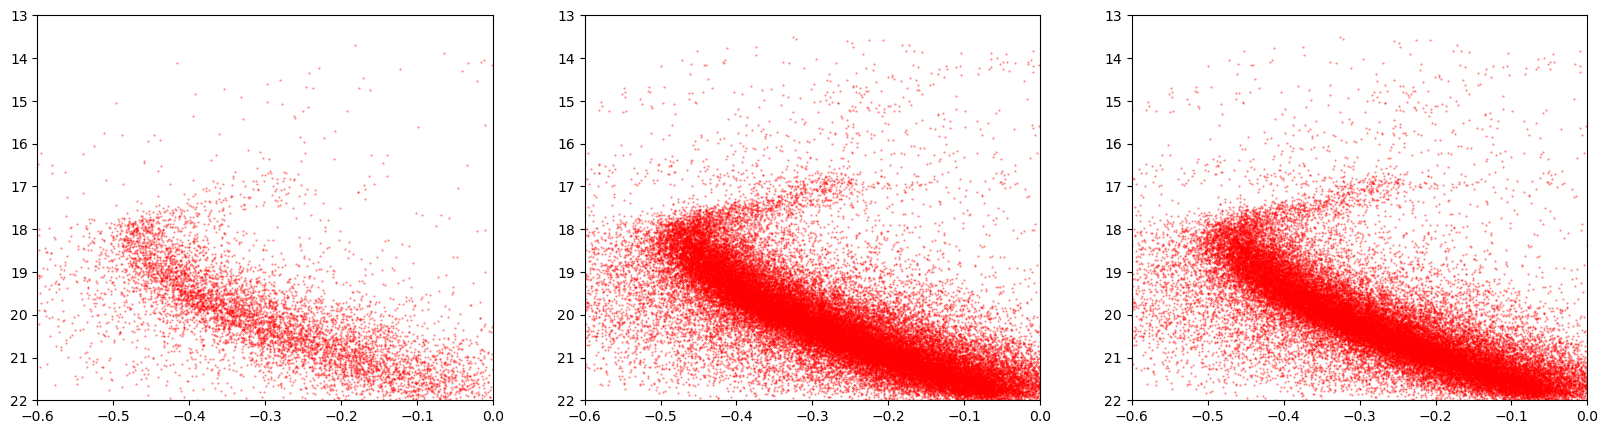

In [32]:
plt.figure(figsize=(20,5))

#minrad=2000
maxrad=1100

plt.subplot(131)
plot_xy(dfvi.mag_vi_1[(dfi.radius<maxrad)],dfv.mag_1[(dfi.radius<maxrad)],fmt='.')
plt.xlim(-0.6,0.0)
plt.ylim(22,13)

plt.subplot(132)
plot_xy(dfvi.mag_vi_1[(dfi.radius>0.0*maxrad)],dfv.mag_1[(dfi.radius>0.0*maxrad)],fmt='.')
plt.xlim(-0.6,0.0)
plt.ylim(22,13)

plt.subplot(133)
plot_xy(dfvi.mag_vi_1[(dfi.radius>maxrad)],dfv.mag_1[(dfi.radius>maxrad)],fmt='.')
plt.xlim(-0.6,0.0)
plt.ylim(22,13)

tmp1=dfvi['mag_vi_1'][(dfi.radius>maxrad)]
tmp2=dfvi['mag_vi_1'][(dfi.radius<maxrad)]
tmp3=dfvi['mag_vi_1'][(dfi.radius>0)]
tmp1.size,tmp2.size,tmp3.size

(22.0, 13.0)

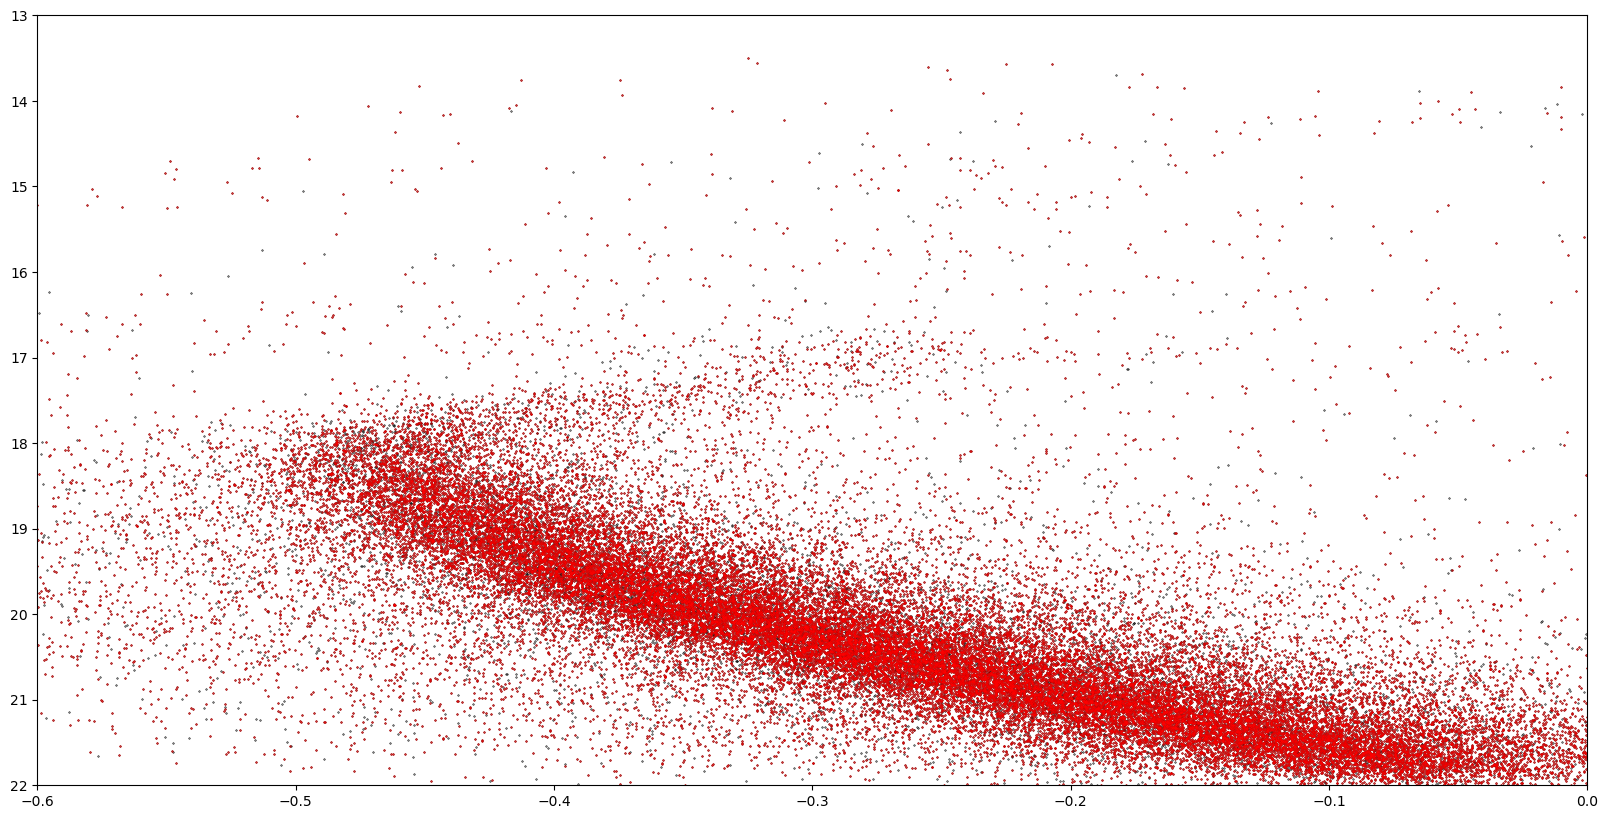

In [33]:
plt.figure(figsize=(20,10))

plot_xy(dfvi.mag_vi_1,dfv.mag_1,color='black',fmt='x')
plot_xy(dfvi.mag_vi_1[(dfi.radius>maxrad)],dfv.mag_1[(dfi.radius>maxrad)],color='red',fmt='x')
plt.xlim(-0.6,0.0)
plt.ylim(22,13)


## Read in DARTMOUTH Isochrone Data...

In [34]:
# Read in data using PANDAS dataframe formet
iso_m05=pd.read_csv('HST_ISOCHRONES/ph_fehm05afep2.HST_ACSWF', skiprows=0, header=1, sep='\s+', index_col=False)
iso_m10=pd.read_csv('HST_ISOCHRONES/ph_fehm10afep2.HST_ACSWF', skiprows=0, header=1, sep='\s+', index_col=False)
iso_m15=pd.read_csv('HST_ISOCHRONES/ph_fehm15afep2.HST_ACSWF', skiprows=0, header=1, sep='\s+', index_col=False)
iso_m20=pd.read_csv('HST_ISOCHRONES/ph_fehm20afep2.HST_ACSWF', skiprows=0, header=1, sep='\s+', index_col=False)
iso_m25=pd.read_csv('HST_ISOCHRONES/ph_fehm25afep2.HST_ACSWF', skiprows=0, header=1, sep='\s+', index_col=False)
iso_p00=pd.read_csv('HST_ISOCHRONES/ph_fehp00afep2.HST_ACSWF', skiprows=0, header=1, sep='\s+', index_col=False)
iso_p03=pd.read_csv('HST_ISOCHRONES/ph_fehp03afep2.HST_ACSWF', skiprows=0, header=1, sep='\s+', index_col=False)
iso_p05=pd.read_csv('HST_ISOCHRONES/ph_fehp05afep2.HST_ACSWF', skiprows=0, header=1, sep='\s+', index_col=False)

iso_new=pd.read_csv('HST_ISOCHRONES/new_maybe.HST_ACSWF', skiprows=0, header=1, sep='\s+', index_col=False)

isochrones = {"m05":iso_m05, "m10":iso_m10, "m15":iso_m15, "m20":iso_m20, "m25":iso_m25, "p00":iso_p00, "p03":iso_p03, "p05":iso_p05, "new":iso_new}

for iso in isochrones.values():
    iso["vi"] = iso["F606W"] - iso["F814W"]

#dfi_m05.dtypes
#iso_m05.head()
#iso_m05.dtypes
#print(iso_m05['F814W'])


## Plot single metallicty Isochrones color-coded by AGE

## Plot three different metallicity Isochrones

(0.1, 1.1)

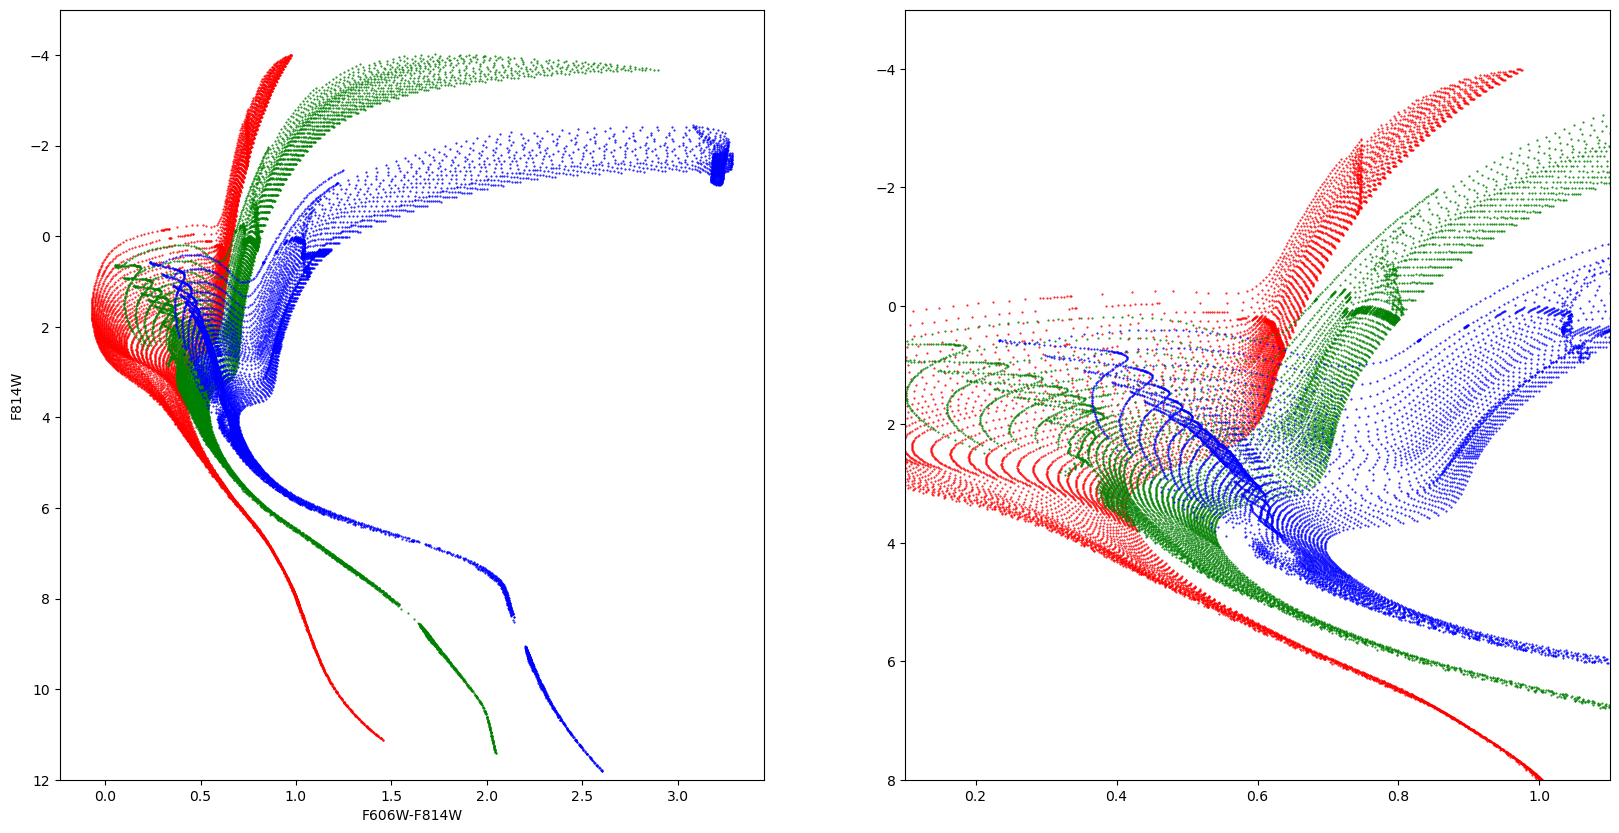

In [35]:
plt.figure(figsize=(20,10))


# plt.scatter(b['VR'],b['Mv'],marker="o",s=1,c=b['age'],linewidth=1)

plt.subplot(121)
plt.scatter(iso_m25['F606W']-iso_m25['F814W'],iso_m25['F814W'],marker=".",s=1,color='red')
plt.scatter(iso_m05['F606W']-iso_m05['F814W'],iso_m05['F814W'],marker=".",s=1,color='green')
plt.scatter(iso_p05['F606W']-iso_p05['F814W'],iso_p05['F814W'],marker=".",s=1,color='blue')
plt.ylim(12,-5)

    ## LABEL YOUR AXES
plt.xlabel('F606W-F814W')
plt.ylabel('F814W')

plt.subplot(122)
plt.scatter(iso_m25['F606W']-iso_m25['F814W'],iso_m25['F814W'],marker=".",s=1,color='red')
plt.scatter(iso_m05['F606W']-iso_m05['F814W'],iso_m05['F814W'],marker=".",s=1,color='green')
plt.scatter(iso_p05['F606W']-iso_p05['F814W'],iso_p05['F814W'],marker=".",s=1,color='blue')
plt.ylim(8,-5)
plt.xlim(0.1,1.1)
#plt.xlim(-0.2,0.8)

    ## LABEL YOUR AXES
#plt.xlabel('B-V')
#plt.ylabel('Mv')
#print (iso_m25.head)

<bound method NDFrame.head of        #EEP      M/Mo  LogTeff    LogG  LogL/Lo    F435W    F475W    F502N  \
0         2  0.108471   3.5533  5.3715  -2.7317  14.4594  13.7081  13.7214   
1         3  0.116421   3.5617  5.3358  -2.6319  14.0762  13.3660  13.3324   
2         4  0.125371   3.5702  5.2990  -2.5286  13.6846  13.0124  12.9328   
3         5  0.137398   3.5798  5.2577  -2.4091  13.2361  12.6042  12.4761   
4         6  0.157888   3.5911  5.2093  -2.2553  12.6783  12.0880  11.9129   
...     ...       ...      ...     ...      ...      ...      ...      ...   
10009   275  0.756566   3.6528  0.7585   3.1230  -1.2958  -1.8271  -2.1356   
10010   276  0.756570   3.6515  0.7280   3.1482  -1.3286  -1.8690  -2.1809   
10011   277  0.756574   3.6502  0.6982   3.1727  -1.3599  -1.9093  -2.2245   
10012   278  0.756578   3.6489  0.6695   3.1964  -1.3896  -1.9478  -2.2661   
10013   279  0.756581   3.6478  0.6429   3.2184  -1.4173  -1.9837  -2.3049   

         F550M    F555W  ...    F

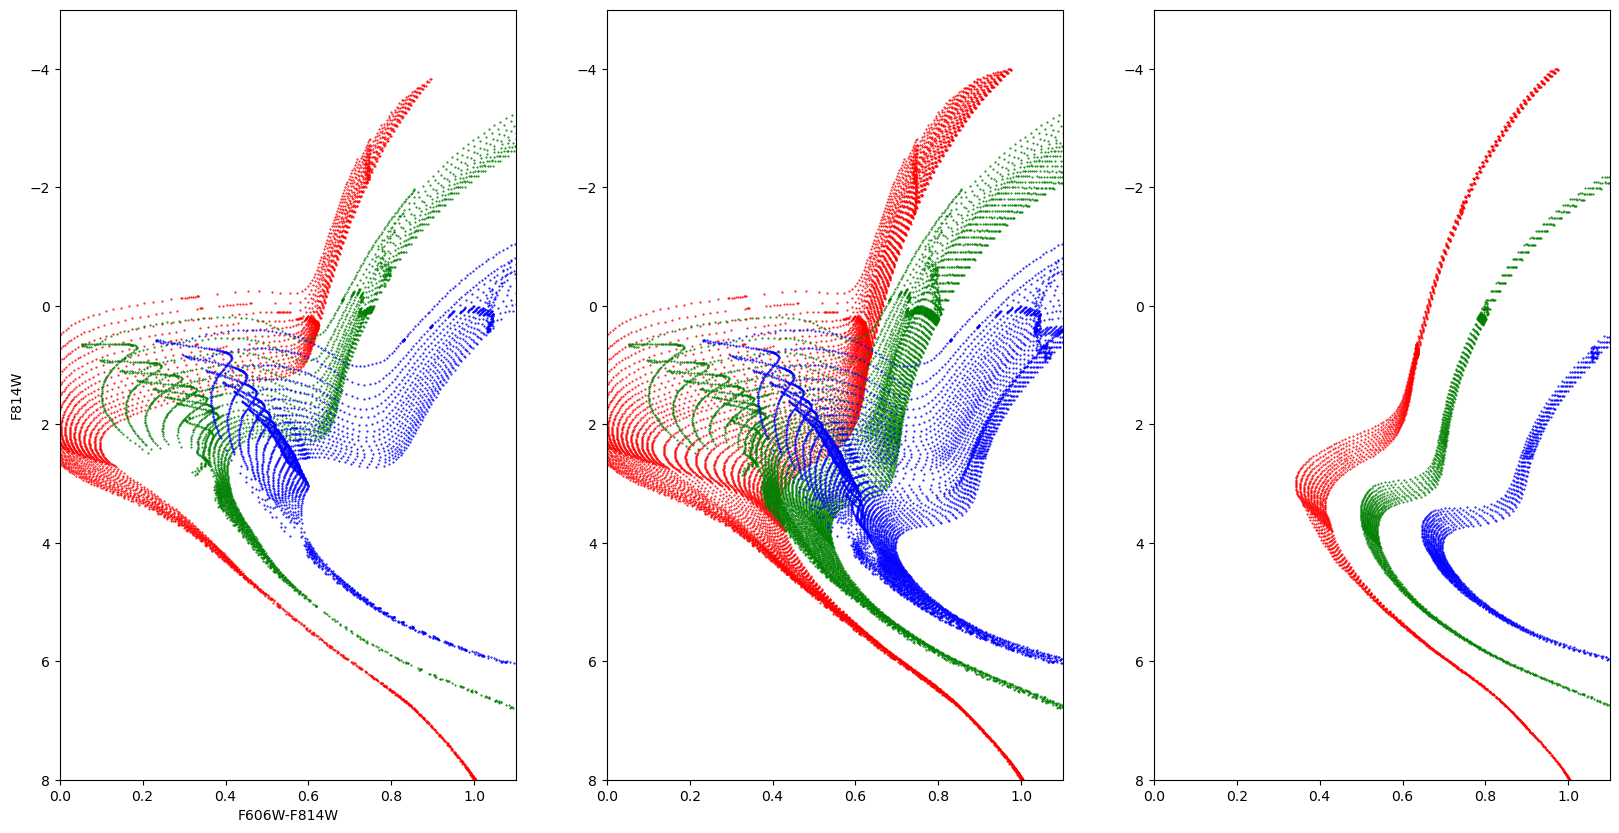

In [36]:
plt.figure(figsize=(20,10))

age_min=10.0
age_max=11.0

iso_m25['vi']=iso_m25['F606W']-iso_m25['F814W']
iso_m05['vi']=iso_m05['F606W']-iso_m05['F814W']
iso_p05['vi']=iso_p05['F606W']-iso_p05['F814W']


plt.subplot(131)
plt.scatter(iso_m25.vi[(iso_m25["Age(Gyrs)"]<5)],iso_m25['F814W'][(iso_m25["Age(Gyrs)"]<5)],marker=".",s=1,color='red')
plt.scatter(iso_m05.vi[(iso_m05["Age(Gyrs)"]<5)],iso_m05['F814W'][(iso_m05["Age(Gyrs)"]<5)],marker=".",s=1,color='green')
plt.scatter(iso_p05.vi[(iso_p05["Age(Gyrs)"]<5)],iso_p05['F814W'][(iso_p05["Age(Gyrs)"]<5)],marker=".",s=1,color='blue')
plt.ylim(8,-5)
plt.xlim(0.0,1.1)

    ## LABEL YOUR AXES
plt.xlabel('F606W-F814W')
plt.ylabel('F814W')

plt.subplot(132)
plt.scatter(iso_m25.vi,iso_m25['F814W'],marker=".",s=1,color='red')
plt.scatter(iso_m05.vi,iso_m05['F814W'],marker=".",s=1,color='green')
plt.scatter(iso_p05.vi,iso_p05['F814W'],marker=".",s=1,color='blue')
plt.ylim(8,-5)
plt.xlim(0.0,1.1)
#plt.xlim(-0.2,0.8)


plt.subplot(133)
plt.scatter(iso_m25.vi[(iso_m25["Age(Gyrs)"]>age_min)],iso_m25['F814W'][(iso_m25["Age(Gyrs)"]>age_min)],marker=".",s=1,color='red')
plt.scatter(iso_m05.vi[(iso_m05["Age(Gyrs)"]>age_min)],iso_m05['F814W'][(iso_m05["Age(Gyrs)"]>age_min)],marker=".",s=1,color='green')
plt.scatter(iso_p05.vi[(iso_p05["Age(Gyrs)"]>age_min)],iso_p05['F814W'][(iso_p05["Age(Gyrs)"]>age_min)],marker=".",s=1,color='blue')
plt.ylim(8,-5)
plt.xlim(0.0,1.1)



## LABEL YOUR AXES
#plt.xlabel('B-V')
#plt.ylabel('Mv')
print (iso_m25.head)

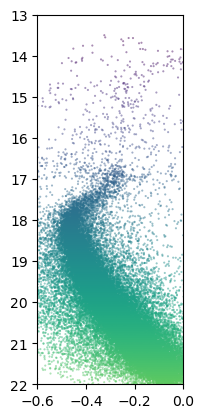

In [37]:
plt.subplot(133)
plot_xy(dfvi['mag_vi_1'],dfv['mag_1'],color=dfv['mag_1'],fmt='.')
plt.xlim(-0.6,0.0)
plt.ylim(22,13)

mainseq = dfvi.loc[((dfvi['mag_vi_1'] >= -0.6) & (dfvi['mag_vi_1'] <= 0))]


14.02168594740346 26.525589718778615
38


/Users/student/anaconda3/envs/astroconda38/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/student/anaconda3/envs/astroconda38/lib/python3.8/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


3000 3000


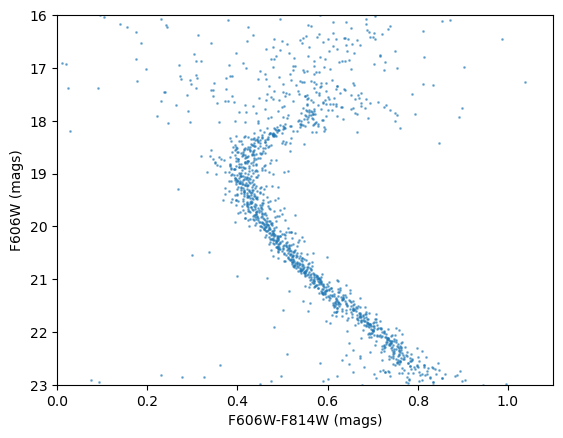

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


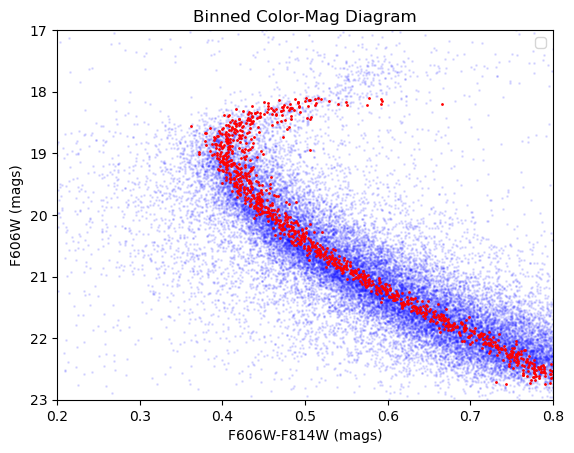

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


1085 1085
400 400


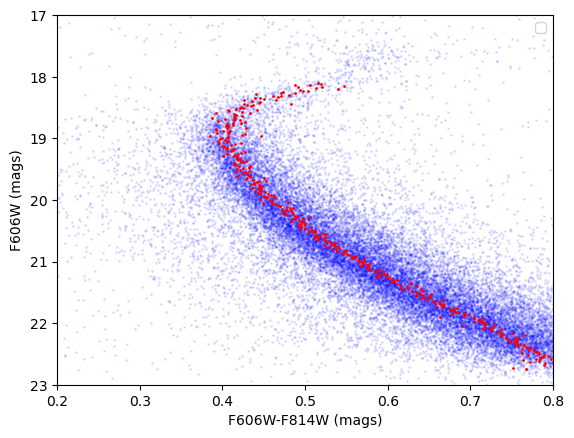

In [38]:
num_vertical_slices = 3000
print(dfv_downselect[mag_col].min(),dfv_downselect[mag_col].max())
# indices of nan mag_col values:
nan_mag_col = np.isnan(dfv_downselect[mag_col])
nan_mag_col = nan_mag_col[nan_mag_col].index
print(len(nan_mag_col))

dfv_downselect = dfv_downselect.drop(nan_mag_col)
dfvi_downselect = dfvi_downselect.drop(nan_mag_col)

values, bin_edges = np.histogram(dfv_downselect[mag_col], bins=num_vertical_slices)

mag_bins = np.digitize(dfv_downselect[mag_col], bin_edges)

mean_color = [np.mean(dfvi_downselect.loc[mag_bins == i, color_col].to_numpy()) for i in range(1, len(bin_edges))]
mean_mag = [np.mean(dfv_downselect.loc[mag_bins == i, mag_col].to_numpy()) for i in range(1, len(bin_edges))]

print(len(mean_color),len(mean_mag))
plt.scatter(mean_color,mean_mag,s=1,alpha=0.5)
plt.xlim(0,1.1)
plt.ylim(23,16)
plt.xlabel("F606W-F814W (mags)")
plt.ylabel("F606W (mags)")
plt.show()

binned_color = np.array([np.median(dfvi_downselect.loc[mag_bins == i, color_col].to_numpy()) for i in range(1, len(bin_edges))])
binned_mag = np.array([np.median(dfv_downselect.loc[mag_bins == i, mag_col].to_numpy()) for i in range(1, len(bin_edges))])

# print(len([i for i in binned_color if abs(i) > 0]))
# binned_color = binned_color[~np.isnan(binned_color)]

binned_down_indices = np.where(np.logical_and(binned_mag>18.1, 22.75>binned_mag))[0]
binned_color = binned_color[binned_down_indices]
binned_mag = binned_mag[binned_down_indices]

binned_down_indices = np.where(binned_color>0.1)[0]
binned_color = binned_color[binned_down_indices]
binned_mag = binned_mag[binned_down_indices]

for arr in binned_mag, binned_color:
    notNan = ~np.isnan(arr)
    binned_mag = binned_mag[notNan]
    binned_color = binned_color[notNan]


# binned_mag = binned_mag[~np.isnan(binned_mag)]

plt.scatter(dfvi_downselect[color_col],dfv_downselect[mag_col],alpha=0.1,s=1,c="blue")

plt.scatter(binned_color,binned_mag,s=1,alpha=1,c="red")
plt.xlabel("F606W-F814W (mags)")
plt.ylabel("F606W (mags)")
plt.xlim(0.2,0.8)
plt.ylim(23,17)
plt.legend()
plt.title("Binned Color-Mag Diagram")
plt.savefig("binned_color_mag.png", bbox_inches='tight')
plt.show()
print(len(binned_color),len(binned_mag))
plt.clf()

values, bin_edges = np.histogram(binned_mag, bins=int(400))

mag_bins = np.digitize(binned_mag, bin_edges)

binned_color2 = np.array([np.median(binned_color[mag_bins == i]) for i in range(1, len(bin_edges))])
binned_mag2 = np.array([np.median(binned_mag[mag_bins == i]) for i in range(1, len(bin_edges))])
print(len(binned_color2),len(binned_mag2))
plt.scatter(dfvi_downselect[color_col],dfv_downselect[mag_col],alpha=0.1,s=1,c="blue")

plt.scatter(binned_color2,binned_mag2,s=1,alpha=1,c="red")
plt.xlabel("F606W-F814W (mags)")
plt.ylabel("F606W (mags)")
plt.xlim(0.2,0.8)
plt.ylim(23,17)
plt.legend()
plt.show()

# binned_color = binned_color2
# binned_mag = binned_mag2

In [39]:
import os
isochrone_index = "m10"

operation = "median"
f = np.median

values, bin_edges = np.histogram(dfv_downselect[mag_col], bins=num_vertical_slices)

mag_bins = np.digitize(dfv_downselect[mag_col], bin_edges)

binned_color = np.array([f(dfvi_downselect.loc[mag_bins == i, color_col].to_numpy()) for i in range(1, len(bin_edges))])
binned_mag = np.array([f(dfv_downselect.loc[mag_bins == i, mag_col].to_numpy()) for i in range(1, len(bin_edges))])

binned_down_indices = np.where(np.logical_and(binned_mag>18.1, 22.75>binned_mag))[0]
binned_color = binned_color[binned_down_indices]
binned_mag = binned_mag[binned_down_indices]

binned_down_indices = np.where(binned_color>0.1)[0]
binned_color = binned_color[binned_down_indices]
binned_mag = binned_mag[binned_down_indices]

for arr in binned_mag, binned_color:
    notNan = ~np.isnan(arr)
    binned_mag = binned_mag[notNan]
    binned_color = binned_color[notNan]


if not os.path.exists(f"{operation}_ranked_fits"):
    os.mkdir(f"{operation}_ranked_fits")

# redefinition so i can see the fit
isochrones = {"m05":iso_m05, "m10":iso_m10, "m15":iso_m15, "m20":iso_m20, "m25":iso_m25, "p00":iso_p00, "p03":iso_p03, "p05":iso_p05, "new":iso_new}
for f_name in os.listdir(f"{operation}_ranked_fits"):
    os.remove(os.path.join(f"{operation}_ranked_fits", f_name))
data_table = isochrones[isochrone_index]
# num_ages = len(iso_m25["Age(Gyrs)"])
# cmap = plt.colormaps.
unique_ages = list(set(data_table["Age(Gyrs)"]))
unique_ages = [a for a in unique_ages if 2 < a and a < 13.9]
unique_ages.sort()
# print(len(unique_ages))


min_age = 5
max_age = 13.9

# mag_offset = 15.8
# dist = 10 ** (mag_offset/5 + 1)
smallest_binned_color_idx = np.argmin(binned_color)
leftmost_binned_mag = binned_mag[smallest_binned_color_idx]
iso_ranking_rows = []
for label, iso in reversed(list(isochrones.items())):
    unique_ages = list(set(iso["Age(Gyrs)"]))
    unique_ages = [a for a in unique_ages if min_age < a and a < max_age]
    unique_ages.sort()
    for i, age in enumerate(unique_ages):
        iso_colors = iso.vi[(iso["Age(Gyrs)"]==unique_ages[i])].to_numpy()
        iso_mags = iso['F606W'][(iso["Age(Gyrs)"]==unique_ages[i])].to_numpy()

        # iso_mag_constraint = np.logical_and(1<iso_mags,iso_mags<6)
        # constrained_iso_colors = iso_colors[iso_mag_constraint]
                
        # smallest_iso_color_idx = np.argmin(constrained_iso_colors)
        # leftmost_iso_mag = iso_mags[iso_mag_constraint][smallest_iso_color_idx]
        # print(f"iso leftmost point: {round(constrained_iso_colors[smallest_iso_color_idx],4)}{round(leftmost_iso_mag,3)}")
        smallest_iso_color_idx = np.argmin(iso_colors)
        leftmost_iso_color = iso_colors[smallest_iso_color_idx]
        leftmost_iso_mag = iso_mags[smallest_iso_color_idx]
        mag_offset = leftmost_binned_mag - leftmost_iso_mag + 0.5
        adjusted_binned_mag = binned_mag - mag_offset

        # iso_points = np.stack((iso_colors,iso_mags),axis=1)
        # adjusted_median = np.stack((binned_color,adjusted_binned_mag),axis=1)
        # print(iso_colors.shape)
        # matrix = pairwise_distance(iso_points,adjusted_median)
        # run our comparison over groups of iso and median points that are within 0.1 mags of each other:
        num_bins = 30
        values, bin_edges = np.histogram(binned_mag, bins=num_bins)
        mag_bins = np.digitize(binned_mag, bin_edges)

        distances = []

        for edge in bin_edges:
            relevant_binned_color = binned_color[np.logical_and(binned_mag>edge,binned_mag<edge+0.1)]
            relevant_binned_mag = binned_mag[np.logical_and(binned_mag>edge,binned_mag<edge+0.1)]
            relevant_iso_colors = iso_colors[np.logical_and(iso_mags>edge,iso_mags<edge+0.1)]
            relevant_iso_mags = iso_mags[np.logical_and(iso_mags>edge,iso_mags<edge+0.1)]
            matrix = oneDimensionPairwiseDistance(binned_color,iso_colors)
            val = f(matrix)
            distances.append(val)

        val = f(distances)

        iso_rankings_row = {"label":label,"age":age,"mag_offset":mag_offset,"distance":val}
        iso_ranking_rows.append(iso_rankings_row)
        print(f"{label} #{i}:t={age}, d={round(val,4)}")

iso_rankings_df = pd.DataFrame(iso_ranking_rows)
# sort by least distance
iso_rankings_df = iso_rankings_df.sort_values(by=["distance"])
iso_rankings_df.to_csv("iso_rankings.csv")
# print(iso_rankings)
i = 0
encountered_label_dict = {}
for i in range(len(iso_rankings_df)):
    row = iso_rankings_df.iloc[i]
    label, data_table, age, mag_offset = row["label"], isochrones[row["label"]], row["age"], row["mag_offset"]
    if label in encountered_label_dict:
        encountered_label_dict[label] += 1
        # if encountered_label_dict[label] > 3:
        #     continue
    else:
        encountered_label_dict[label] = 1
    dist = 10 ** (mag_offset/5 + 1)
    # i+=1
    # if i == 10:
    #     break
    plt.scatter(dfvi_downselect[color_col],dfv_downselect[mag_col]-mag_offset,c=dfv_downselect[mag_col],marker='.',alpha=0.01)
    plt.scatter(binned_color,binned_mag-mag_offset,s=1,alpha=0.5,c="red", label = "Median")
    plt.scatter(data_table.vi[(data_table["Age(Gyrs)"]==age)],data_table['F606W'][(data_table["Age(Gyrs)"]==age)],marker=".",s=1,label=f"ISO {label.upper()}",color='blue',alpha=0.75)
    plt.title(f"Z={round(data_table['Z'].mean(),4)}, t={age}Gyr, d={round(dist)}pc")
    plt.xlabel("F606W-F814W (mags)")
    plt.ylabel("F606W (mags)")
    plt.xlim(0.2,0.85)
    plt.legend()
    # plt.xlim(-0.6,0.0)
    plt.ylim(7,-2)
    plt.savefig(f"{operation}_ranked_fits/{i}_{label}_z{str(round(data_table['Z'].mean(),4)).replace('.','_')}_t{str(age).replace('.','_')}_d{round(dist)}.png", bbox_inches='tight')
    plt.clf()

new #0:t=5.5, d=0.2272
new #1:t=6.0, d=0.2167
new #2:t=6.5, d=0.2064
new #3:t=7.0, d=0.1978
new #4:t=7.5, d=0.1901
new #5:t=8.0, d=0.1835
new #6:t=8.5, d=0.1784
new #7:t=9.0, d=0.1744
new #8:t=9.5, d=0.1715
new #9:t=10.0, d=0.1687
new #10:t=10.5, d=0.1677
new #11:t=11.0, d=0.1669
new #12:t=11.5, d=0.1666
new #13:t=12.0, d=0.1664
new #14:t=12.5, d=0.1658
new #15:t=13.0, d=0.1662
new #16:t=13.5, d=0.1664
p05 #0:t=5.5, d=0.31
p05 #1:t=6.0, d=0.329
p05 #2:t=6.5, d=0.3473
p05 #3:t=7.0, d=0.363
p05 #4:t=7.5, d=0.3803
p05 #5:t=8.0, d=0.3936
p05 #6:t=8.5, d=0.4029
p05 #7:t=9.0, d=0.4081
p05 #8:t=9.5, d=0.4163
p05 #9:t=10.0, d=0.426
p05 #10:t=10.5, d=0.4365
p05 #11:t=11.0, d=0.447
p05 #12:t=11.5, d=0.454
p05 #13:t=12.0, d=0.4628
p05 #14:t=12.5, d=0.4712
p05 #15:t=13.0, d=0.4794
p05 #16:t=13.5, d=0.4877
p03 #0:t=5.5, d=0.2672
p03 #1:t=6.0, d=0.2828
p03 #2:t=6.5, d=0.2954
p03 #3:t=7.0, d=0.3084
p03 #4:t=7.5, d=0.3202
p03 #5:t=8.0, d=0.3292
p03 #6:t=8.5, d=0.3403
p03 #7:t=9.0, d=0.3511
p03 #8:t=9.

<Figure size 640x480 with 0 Axes>

iso leftmost point: 0.4324 3.724
median leftmost point: 0.3626 18.555
14.830885769304889
Plotting isochrone for age: 9.5
      #EEP      M/Mo  LogTeff    LogG  LogL/Lo    F435W    F475W    F502N  \
6829    11  0.105752   3.5205  5.3356  -2.8381  15.3727  14.5592  14.6270   
6830    12  0.118958   3.5235  5.2757  -2.7150  14.9860  14.1928  14.2450   
6831    13  0.135065   3.5269  5.2137  -2.5842  14.5741  13.8019  13.8381   
6832    14  0.155498   3.5320  5.1573  -2.4461  14.1190  13.3715  13.3886   
6833    15  0.178015   3.5393  5.1181  -2.3190  13.6633  12.9440  12.9409   

        F550M    F555W  ...    F814W   F850LP  #MIX-LEN       Y         Z  \
6829  13.2259  13.6172  ...  11.2209  10.8237     1.938  0.2489  0.002397   
6830  12.8786  13.2624  ...  10.9099  10.5181     1.938  0.2489  0.002397   
6831  12.5089  12.8844  ...  10.5787  10.1929     1.938  0.2489  0.002397   
6832  12.1053  12.4704  ...  10.2269   9.8503     1.938  0.2489  0.002397   
6833  11.7098  12.0626  ...   9

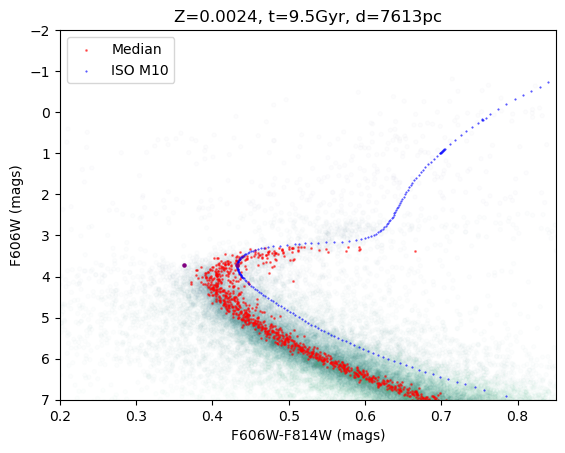

In [40]:
isochrones = {"m05":iso_m05, "m10":iso_m10, "m15":iso_m15, "m20":iso_m20, "m25":iso_m25, "p00":iso_p00, "p03":iso_p03, "p05":iso_p05}
isochrone_index = "m10"
data_table = isochrones[isochrone_index]
# num_ages = len(iso_m25["Age(Gyrs)"])
# cmap = plt.colormaps.
unique_ages = list(set(data_table["Age(Gyrs)"]))
unique_ages.sort()
# print(len(unique_ages))


# mag_offset = 15.8
# dist = 10 ** (mag_offset/5 + 1)
smallest_binned_color_idx = np.argmin(binned_color)
leftmost_binned_mag = binned_mag[smallest_binned_color_idx]
i=25
age = unique_ages[i]
iso_colors = data_table.vi[(data_table["Age(Gyrs)"]==unique_ages[i])].to_numpy()
iso_mags = data_table['F606W'][(data_table["Age(Gyrs)"]==unique_ages[i])].to_numpy()

label = isochrone_index

# iso_mag_constraint = np.logical_and(1<iso_mags,iso_mags<6)
# constrained_iso_colors = iso_colors[iso_mag_constraint]
# constrained_iso_mags = iso_mags[iso_mag_constraint]

# smallest_iso_color_idx = np.argmin(constrained_iso_colors)
# leftmost_iso_mag = constrained_iso_mags[smallest_iso_color_idx]

smallest_iso_color_idx = np.argmin(iso_colors)

leftmost_iso_color = iso_colors[smallest_iso_color_idx]
leftmost_iso_mag = iso_mags[smallest_iso_color_idx]

print(f"iso leftmost point: {round(leftmost_iso_color,4)} {round(leftmost_iso_mag,3)}")
print(f"median leftmost point: {round(binned_color[smallest_binned_color_idx],4)} {round(leftmost_binned_mag,3)}")
dist = 10 ** (mag_offset/5 + 1)
mag_offset = leftmost_binned_mag - leftmost_iso_mag
print(mag_offset)

i+=1

# Print the age
print(f"Plotting isochrone for age: {age}")

# Print the first few rows of the filtered data
print(data_table[(data_table["Age(Gyrs)"]==age)].head())

# Print the plot inputs
print(f"Color values: {data_table.vi[(data_table['Age(Gyrs)']==age)]}")
print(f"Magnitude values: {data_table['F814W'][(data_table['Age(Gyrs)']==age)]}")

plt.scatter(dfvi_downselect[color_col],dfv_downselect[mag_col]-mag_offset,c=dfv_downselect[mag_col],marker='.',alpha=0.01)
plt.scatter(binned_color,binned_mag-mag_offset,s=1,alpha=0.5,c="red", label = "Median")
plt.scatter(data_table.vi[(data_table["Age(Gyrs)"]==age)],data_table['F606W'][(data_table["Age(Gyrs)"]==age)],marker=".",s=1,label=f"ISO {label.upper()}",color='blue',alpha=0.75)
plt.title(f"Z={round(data_table['Z'].mean(),4)}, t={age}Gyr, d={round(dist)}pc")
plt.xlabel("F606W-F814W (mags)")
plt.ylabel("F606W (mags)")

#plot both letfmost points
plt.scatter(binned_color[smallest_binned_color_idx],leftmost_binned_mag-mag_offset,s=5,alpha=1,c="Purple")
plt.scatter(iso_colors[smallest_iso_color_idx],leftmost_iso_mag,s=5,alpha=1,c="Purple")

plt.xlim(0.2,0.85)
plt.legend()
# plt.xlim(-0.6,0.0)
plt.ylim(7,-2)
plt.show()

plt.show()


In [44]:
class isoFit:
    def __init__(self,name,iso,ages,mag_offset):
        self.name = name
        self.iso = iso
        self.ages = ages
        self.mag_offset = mag_offset
        self.colors = [iso.vi[(iso["Age(Gyrs)"]==age)] for age in ages]
        self.mags = [iso["F606W"][(iso["Age(Gyrs)"]==age)] for age in ages]
        self.labels = [str(age)+" Gy" for age in ages]
        self.dist = 10 ** (mag_offset/5 + 1)

M10 = isoFit("M10",iso_m10,[7.0,7.5,8],15.38)
M15 = isoFit("M15",iso_m15,[10,10.5,11],15.28)
M20 = isoFit("M20",iso_m20,[12.5,13,13.5],15.23)
M25 = isoFit("M25",iso_m25,[13.5,14.0,14.5],15.26)

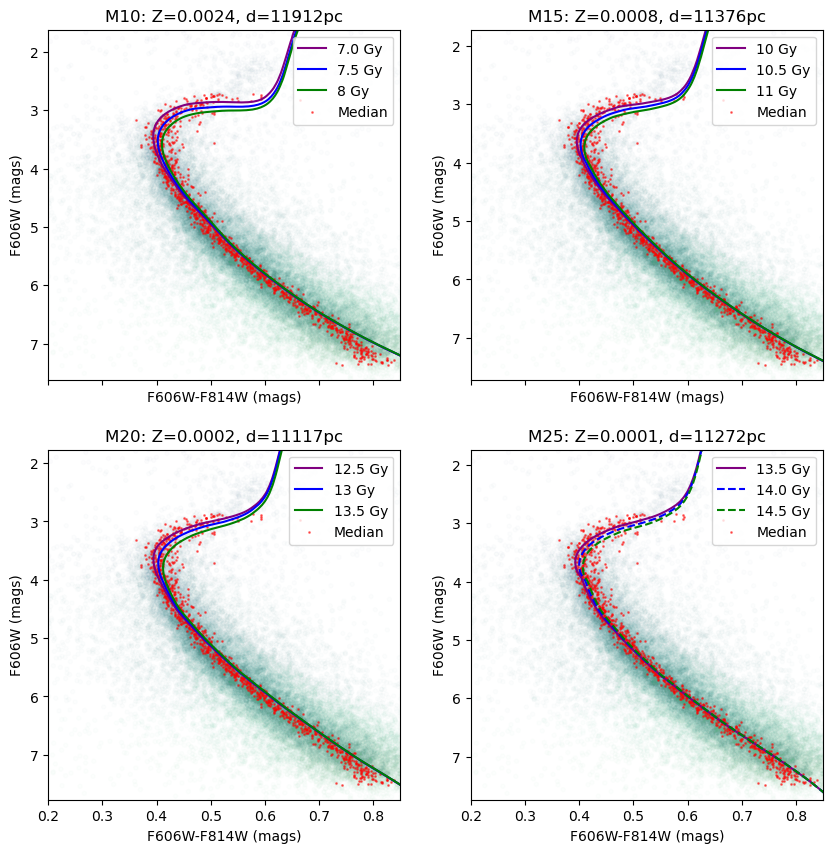

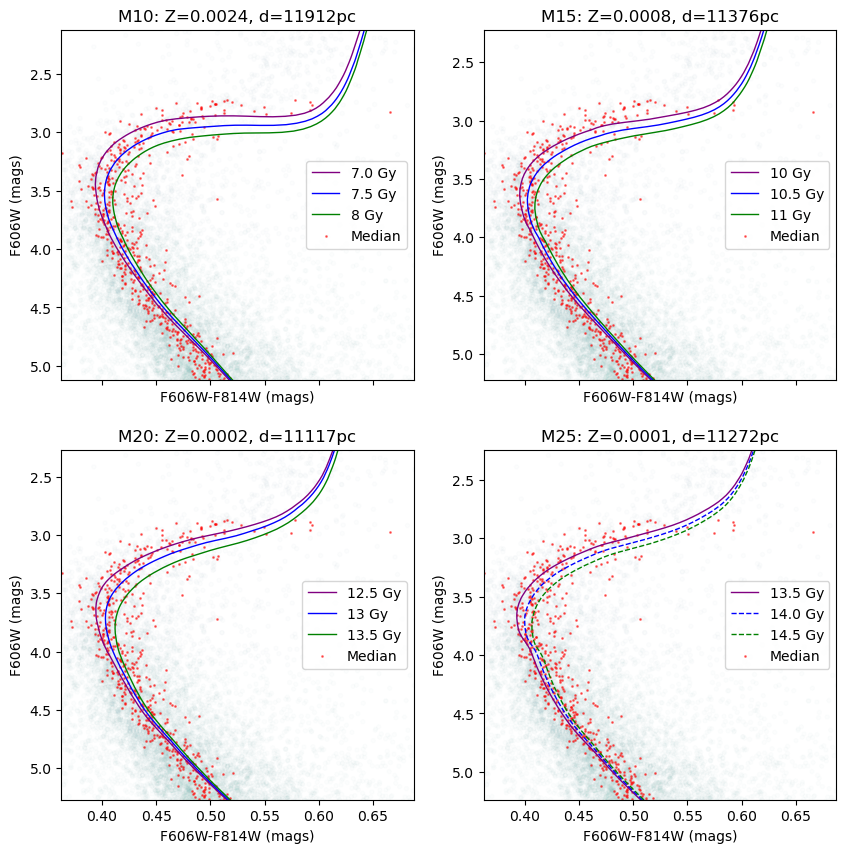

In [73]:
iso_fits = [M10,M15,M20,M25]


fig, axes = plt.subplots(ncols=2,nrows=2,sharex=True,figsize=(10,10))
for ax, iso_fit in zip(axes.flatten(),iso_fits):
    c=["green","blue","purple"]
    for color, mag, label, age in zip(iso_fit.colors, iso_fit.mags, iso_fit.labels, iso_fit.ages):
        ax.plot(color,mag,linewidth=1.5,label=label,color=c.pop(),linestyle="dashed" if age > 13.5 else "solid")
    ax.scatter(dfvi_downselect[color_col],dfv_downselect[mag_col]-iso_fit.mag_offset,c=dfv_downselect[mag_col],marker='.',alpha=0.01)
    ax.scatter(binned_color,binned_mag-iso_fit.mag_offset,s=1,alpha=0.5,c="red", label = "Median")
    ax.set_xlabel("F606W-F814W (mags)")
    ax.set_ylabel("F606W (mags)")
    ax.set_xlim(0.2,0.85)
    ax.set_ylim(23-iso_fit.mag_offset,17-iso_fit.mag_offset)
    ax.set_title(f"{iso_fit.name}: Z={round(iso_fit.iso['Z'].mean(),4)}, d={round(iso_fit.dist)}pc")
    ax.legend()
plt.savefig("big_iso_fits.png", bbox_inches='tight')
plt.show()

fig, axes = plt.subplots(ncols=2,nrows=2,sharex=True,figsize=(10,10))
for ax, iso_fit in zip(axes.flatten(),iso_fits):
    c=["green","blue","purple"]
    for color, mag, label, age in zip(iso_fit.colors, iso_fit.mags, iso_fit.labels, iso_fit.ages):
        ax.plot(color,mag,linewidth=1,label=label,color=c.pop(),linestyle="dashed" if age > 13.5 else "solid")
    ax.scatter(dfvi_downselect[color_col],dfv_downselect[mag_col]-iso_fit.mag_offset,c=dfv_downselect[mag_col],marker='.',alpha=0.01)
    ax.scatter(binned_color,binned_mag-iso_fit.mag_offset,s=1,alpha=0.5,c="red", label = "Median")
    ax.set_xlabel("F606W-F814W (mags)")
    ax.set_ylabel("F606W (mags)")
    d = 0.85-0.2
    ax.set_xlim(0.2+d/4,0.85-d/4)
    d = 23-17
    ax.set_ylim(22-iso_fit.mag_offset-d/4,16-iso_fit.mag_offset+d/4)
    ax.set_title(f"{iso_fit.name}: Z={round(iso_fit.iso['Z'].mean(),4)}, d={round(iso_fit.dist)}pc")
    ax.legend()
plt.savefig("zoomed_iso_fits.png", bbox_inches='tight')
plt.show()
# plt.clf()
# plt.scatter(dfvi_downselect[color_col],dfv_downselect[mag_col]-mag_offset,c=dfv_downselect[mag_col],marker='.',alpha=0.01)
# plt.scatter(binned_color,binned_mag-mag_offset,s=1,alpha=0.5,c="red", label = "Median")
# c=["yellow","green","blue","purple"]
# for age, color, mag, label in zip(iso_ages, iso_colors, iso_mags, iso_labels):
#     plt.plot(color,mag,linewidth=1.5,label=label,color=c.pop(),linestyle="dashed" if age > 13.5 else "solid")
# iso_ages_strs = [str(a) for a in iso_ages]
# plt.title(f"{iso_name}: Z={round(iso['Z'].mean(),4)}, t={', '.join(iso_ages_strs)}Gyr, d={round(dist)}pc")
# plt.xlabel("F606W-F814W (mags)")
# plt.ylabel("F606W (mags)")
# plt.xlim(0.2,0.85)
# plt.legend()
# plt.ylim(23-mag_offset,17-mag_offset)
# plt.savefig(f"selected/{iso_name}_selected_isochrones.png")
# plt.show()


0


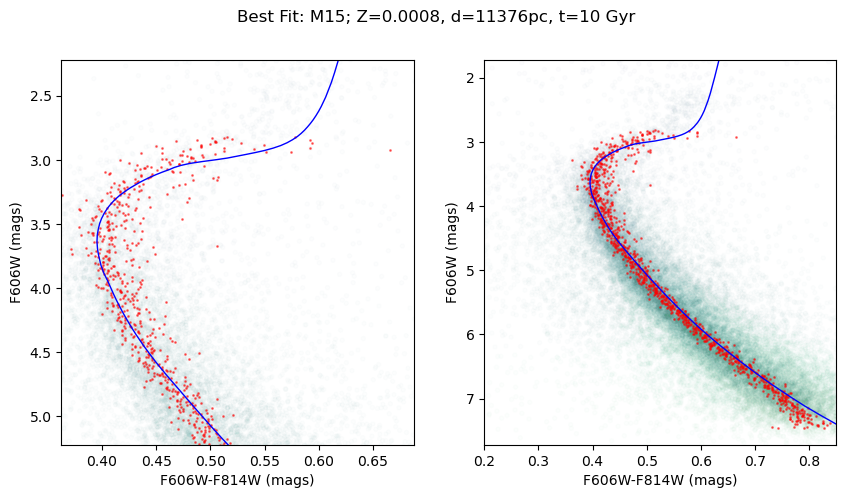

In [54]:
# create a side-by-side view of the 10 Gyr isochrone from the M15 family (the best fit isochrone) at regular and zoomed scales

iso_fit = M15
best_age = 10
fig, axes = plt.subplots(ncols=2, figsize=(10,5))

best_age_idx = np.where(np.array(iso_fit.ages)==best_age)[0][0]
print(best_age_idx)
color, mag, label, age = iso_fit.colors[best_age_idx], iso_fit.mags[best_age_idx], iso_fit.labels[best_age_idx], iso_fit.ages[best_age_idx]

ax = axes[0]
c=["green","blue","purple"]
ax.plot(color,mag,linewidth=1,label=label,color="blue")
ax.scatter(dfvi_downselect[color_col],dfv_downselect[mag_col]-iso_fit.mag_offset,c=dfv_downselect[mag_col],marker='.',alpha=0.01)
ax.scatter(binned_color,binned_mag-iso_fit.mag_offset,s=1,alpha=0.5,c="red", label = "Median")
ax.set_xlabel("F606W-F814W (mags)")
ax.set_ylabel("F606W (mags)")
d = 0.85-0.2
ax.set_xlim(0.2+d/4,0.85-d/4)
d = 23-17
ax.set_ylim(22-iso_fit.mag_offset-d/4,16-iso_fit.mag_offset+d/4)

ax = axes[1]
c=["green","blue","purple"]
ax.plot(color,mag,linewidth=1,label=label,color="blue")
ax.scatter(dfvi_downselect[color_col],dfv_downselect[mag_col]-iso_fit.mag_offset,c=dfv_downselect[mag_col],marker='.',alpha=0.01)
ax.scatter(binned_color,binned_mag-iso_fit.mag_offset,s=1,alpha=0.5,c="red", label = "Median")
ax.set_xlabel("F606W-F814W (mags)")
ax.set_ylabel("F606W (mags)")
ax.set_xlim(0.2,0.85)
ax.set_ylim(23-iso_fit.mag_offset,17-iso_fit.mag_offset)

plt.suptitle(f"Best Fit: {iso_fit.name}; Z={round(iso_fit.iso['Z'].mean(),4)}, d={round(iso_fit.dist)}pc, t={best_age} Gyr",va="top")

plt.savefig("best_fit.png", bbox_inches='tight')
plt.show()

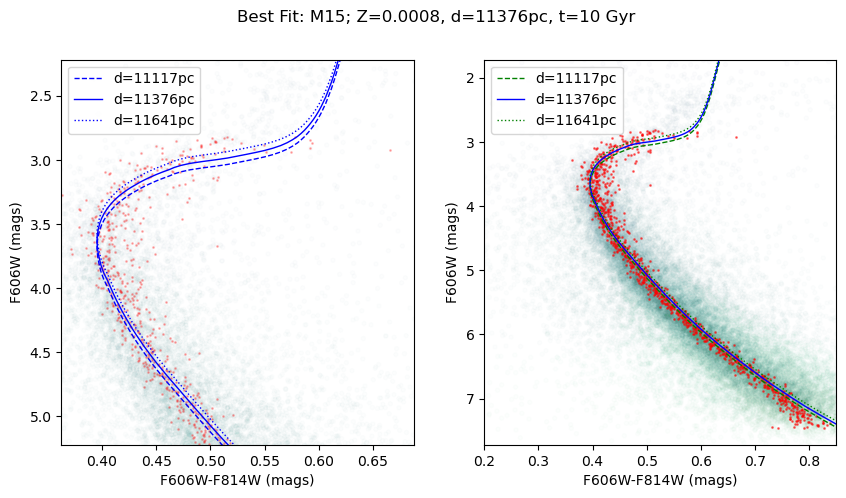

In [67]:
distance_uncert = 0.05  # mags

def distance(mag):
    return 10 ** ((mag+5)/5)

fig, axes = plt.subplots(ncols=2, figsize=(10,5))
ax = axes[0]
c=["green","blue","purple"]

ax.plot(color,mag+distance_uncert,linewidth=1,label=f"d={round(distance(iso_fit.mag_offset-distance_uncert))}pc",color="blue",linestyle="dashed")
ax.plot(color,mag,linewidth=1,label=f"d={round(distance(iso_fit.mag_offset))}pc",color="blue")
ax.plot(color,mag-distance_uncert,linewidth=1,label=f"d={round(distance(iso_fit.mag_offset+distance_uncert))}pc",color="blue",linestyle="dotted")
ax.scatter(dfvi_downselect[color_col],dfv_downselect[mag_col]-iso_fit.mag_offset,c=dfv_downselect[mag_col],marker='.',alpha=0.01)
ax.legend()
ax.scatter(binned_color,binned_mag-iso_fit.mag_offset,s=1,alpha=0.25,c="red", label = "Median")
ax.set_xlabel("F606W-F814W (mags)")
ax.set_ylabel("F606W (mags)")
d = 0.85-0.2
ax.set_xlim(0.2+d/4,0.85-d/4)
d = 23-17
ax.set_ylim(22-iso_fit.mag_offset-d/4,16-iso_fit.mag_offset+d/4)

ax = axes[1]
c=["green","blue","purple"]
#isochrone
ax.plot(color,mag+distance_uncert,linewidth=1,label=f"d={round(distance(iso_fit.mag_offset-distance_uncert))}pc",color="green",linestyle="dashed")
ax.plot(color,mag,linewidth=1,label=f"d={round(distance(iso_fit.mag_offset))}pc",color="blue")
ax.plot(color,mag-distance_uncert,linewidth=1,label=f"d={round(distance(iso_fit.mag_offset+distance_uncert))}pc",color="green",linestyle="dotted")
#all data
ax.legend()
ax.scatter(dfvi_downselect[color_col],dfv_downselect[mag_col]-iso_fit.mag_offset,c=dfv_downselect[mag_col],marker='.',alpha=0.01)
# median data
ax.scatter(binned_color,binned_mag-iso_fit.mag_offset,s=1,alpha=0.5,c="red", label = "Median")
ax.set_xlabel("F606W-F814W (mags)")
ax.set_ylabel("F606W (mags)")
ax.set_xlim(0.2,0.85)
ax.set_ylim(23-iso_fit.mag_offset,17-iso_fit.mag_offset)

plt.suptitle(f"Best Fit: {iso_fit.name}; Z={round(iso_fit.iso['Z'].mean(),4)}, d={round(iso_fit.dist)}pc, t={best_age} Gyr",va="top")

plt.savefig("best_fit.png", bbox_inches='tight')
plt.show()